# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

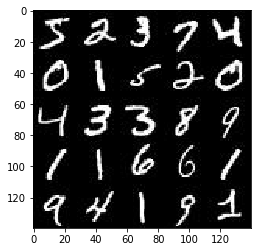

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

In [3]:
# import matplotlib
# matplotlib.__version__
# !pip install -U matplotlib==2.0.2

In [4]:
mnist_images.shape

(25, 28, 28, 1)

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

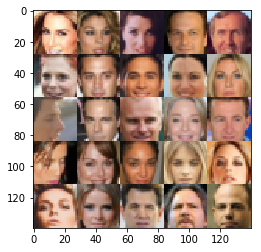

In [5]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf
import tensorflow.contrib.slim as slim

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

/home/jsingh/anaconda3/envs/cv3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.
TensorFlow Version: 1.7.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [7]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32,[None,image_width,image_height,image_channels])
    input_z = tf.placeholder(tf.float32,[None,z_dim])
    learning_rate = tf.placeholder(tf.float32)
    return input_real,input_z,learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [8]:
def discriminator(images, reuse=False,alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope("discriminator",reuse=reuse):
        # input_shape : (32,32,3)
        net = slim.conv2d(images,64,5,stride=2,activation_fn=None) # (32,32,16)
        net = tf.maximum(alpha*net,net)
        net = slim.conv2d(net,128,5,stride=2,activation_fn=None)
        net = slim.batch_norm(net)
        net = tf.maximum(alpha*net,net)
        net = slim.conv2d(net,256,5,stride=2,activation_fn=None)
        net = slim.batch_norm(net)
        net = tf.maximum(alpha*net,net)
        net = slim.flatten(net)
        logits = slim.fully_connected(net,1,activation_fn=None)
        out = tf.sigmoid(logits)
    return out,logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [19]:
def generator(z,out_channel_dim,is_train=True,alpha=.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope("generator",reuse=not is_train):
        net = slim.fully_connected(z,4*4*512,activation_fn=None)
        net = tf.reshape(net,[-1,4,4,512])
        net = slim.batch_norm(net,is_training=is_train)
        net = tf.maximum(alpha*net,net)    # (4,4,)
        net = tf.layers.conv2d_transpose(net,256,5,strides=2)
        net = slim.batch_norm(net,is_training=is_train)
        net = tf.maximum(alpha*net,net)    # (8,8,)
        net = tf.layers.conv2d_transpose(net,128,5)
        net = slim.batch_norm(net,is_training=is_train)
        net = tf.maximum(alpha*net,net)  
        net = tf.layers.conv2d_transpose(net,64,5,strides=2)
        net = slim.batch_norm(net,is_training=is_train)         
        net = tf.maximum(alpha*net,net) # (16,16,)
        net = tf.layers.conv2d_transpose(net,32,5)
        net = slim.batch_norm(net,is_training=is_train)
        net = tf.maximum(alpha*net,net) 
        net = tf.layers.conv2d_transpose(net,out_channel_dim,5,strides=2) #(32,32,output_channel_dim)
        net = tf.image.resize_images(net,[28,28]) # (28,28,C)
        out = tf.tanh(net)
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [20]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    gen_out = generator(input_z,out_channel_dim,is_train=True)
    d_out_real,d_logits_real = discriminator(input_real,reuse=False)
    d_out_fake,d_logits_fake = discriminator(gen_out,reuse=True)
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(d_logits_real)
                                                          ,logits=d_logits_real))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.zeros_like(d_logits_fake)
                                                          ,logits=d_logits_fake))
    d_loss = d_loss_real+d_loss_fake
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(d_logits_fake)
                                                     ,logits=d_logits_fake))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [21]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
   # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [22]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [28]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    
    # print parameters
    DISPLAY_STEP = 100
    GEN_DISPLAY_STEP = 10*DISPLAY_STEP
    
    # TODO: Build Model
    step = 0
    im_width , im_height , im_channels = data_shape[1:]
    
    input_real,input_z,lr = model_inputs(im_width,im_height,im_channels,z_dim)
    d_loss,g_loss = model_loss(input_real,input_z,im_channels)
    d_opt,g_opt = model_opt(d_loss,g_loss,lr,beta1)
     
    with tf.Session() as sess:    
        sess.run([tf.global_variables_initializer(),tf.local_variables_initializer()])
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                step += 1 
                # TODO: Train Model
                
                # getting batch data
                batch_real = 2*batch_images # scale to -1 to 1
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # training the model
                _,d_l = sess.run([d_opt,d_loss],feed_dict={input_real:batch_real,input_z:batch_z,
                                                           lr:learning_rate})
                _,g_l = sess.run([g_opt,g_loss],feed_dict={input_real:batch_real,input_z:batch_z
                                                           ,lr:learning_rate})
                
                if step % DISPLAY_STEP == 0 :
                    print ("Epoch : {}/{} ... Step : {} ... d_loss : {} ... g_loss : {}"
                           .format(epoch_i+1,epoch_count,step,d_l,g_l))
                
                if step % GEN_DISPLAY_STEP == 0 :
                    n_images = 25
                    show_generator_output(sess,n_images,input_z,im_channels,data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch : 1/10 ... Step : 10 ... d_loss : 2.361621141433716 ... g_loss : 4.99431848526001
Epoch : 1/10 ... Step : 20 ... d_loss : 7.373188018798828 ... g_loss : 20.763671875
Epoch : 1/10 ... Step : 30 ... d_loss : 0.5201375484466553 ... g_loss : 4.905299186706543
Epoch : 1/10 ... Step : 40 ... d_loss : 0.4111209809780121 ... g_loss : 8.476125717163086
Epoch : 1/10 ... Step : 50 ... d_loss : 2.28529953956604 ... g_loss : 10.885869026184082
Epoch : 1/10 ... Step : 60 ... d_loss : 0.29511338472366333 ... g_loss : 4.680572986602783
Epoch : 1/10 ... Step : 70 ... d_loss : 0.6143096089363098 ... g_loss : 6.440779209136963
Epoch : 1/10 ... Step : 80 ... d_loss : 1.9024221897125244 ... g_loss : 3.7445569038391113
Epoch : 1/10 ... Step : 90 ... d_loss : 0.49819475412368774 ... g_loss : 3.134780168533325
Epoch : 1/10 ... Step : 100 ... d_loss : 1.3792026042938232 ... g_loss : 2.3529410362243652


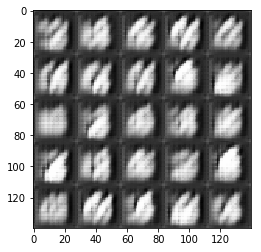

Epoch : 1/10 ... Step : 110 ... d_loss : 0.7322214841842651 ... g_loss : 5.452973365783691
Epoch : 1/10 ... Step : 120 ... d_loss : 1.000641107559204 ... g_loss : 3.264563798904419
Epoch : 1/10 ... Step : 130 ... d_loss : 0.615900993347168 ... g_loss : 2.033020257949829
Epoch : 1/10 ... Step : 140 ... d_loss : 0.9023979902267456 ... g_loss : 2.7618794441223145
Epoch : 1/10 ... Step : 150 ... d_loss : 0.5023044943809509 ... g_loss : 2.821488618850708
Epoch : 1/10 ... Step : 160 ... d_loss : 2.169607162475586 ... g_loss : 6.311627388000488
Epoch : 1/10 ... Step : 170 ... d_loss : 0.9889644384384155 ... g_loss : 2.043548107147217
Epoch : 1/10 ... Step : 180 ... d_loss : 0.9074903726577759 ... g_loss : 1.3772085905075073
Epoch : 1/10 ... Step : 190 ... d_loss : 0.4515075981616974 ... g_loss : 3.976177215576172
Epoch : 1/10 ... Step : 200 ... d_loss : 0.8644688129425049 ... g_loss : 4.633160591125488


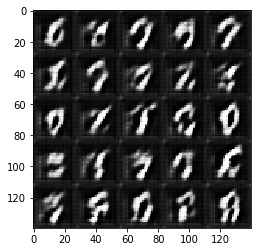

Epoch : 1/10 ... Step : 210 ... d_loss : 0.47422486543655396 ... g_loss : 3.6488590240478516
Epoch : 1/10 ... Step : 220 ... d_loss : 2.2917728424072266 ... g_loss : 2.182622194290161
Epoch : 1/10 ... Step : 230 ... d_loss : 2.3606293201446533 ... g_loss : 8.651785850524902
Epoch : 1/10 ... Step : 240 ... d_loss : 0.9486662149429321 ... g_loss : 2.3444161415100098
Epoch : 1/10 ... Step : 250 ... d_loss : 2.124610424041748 ... g_loss : 0.5320403575897217
Epoch : 1/10 ... Step : 260 ... d_loss : 0.7548282146453857 ... g_loss : 2.0639567375183105
Epoch : 1/10 ... Step : 270 ... d_loss : 0.7531898021697998 ... g_loss : 1.8795863389968872
Epoch : 1/10 ... Step : 280 ... d_loss : 1.2840933799743652 ... g_loss : 1.5799566507339478
Epoch : 1/10 ... Step : 290 ... d_loss : 1.395229458808899 ... g_loss : 0.6368680000305176
Epoch : 1/10 ... Step : 300 ... d_loss : 1.1772936582565308 ... g_loss : 1.781567096710205


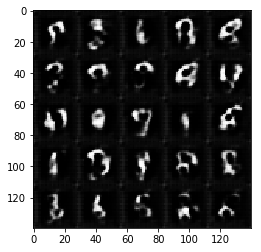

Epoch : 1/10 ... Step : 310 ... d_loss : 0.8946693539619446 ... g_loss : 2.2221875190734863
Epoch : 1/10 ... Step : 320 ... d_loss : 0.848572313785553 ... g_loss : 2.833199977874756
Epoch : 1/10 ... Step : 330 ... d_loss : 1.1410192251205444 ... g_loss : 0.9634056091308594
Epoch : 1/10 ... Step : 340 ... d_loss : 0.9632564783096313 ... g_loss : 1.9705804586410522
Epoch : 1/10 ... Step : 350 ... d_loss : 0.824105441570282 ... g_loss : 2.342332124710083
Epoch : 1/10 ... Step : 360 ... d_loss : 1.1066964864730835 ... g_loss : 1.4322378635406494
Epoch : 1/10 ... Step : 370 ... d_loss : 0.9905856847763062 ... g_loss : 2.2335381507873535
Epoch : 1/10 ... Step : 380 ... d_loss : 1.4210095405578613 ... g_loss : 0.8017110824584961
Epoch : 1/10 ... Step : 390 ... d_loss : 0.9973539113998413 ... g_loss : 2.3943727016448975
Epoch : 1/10 ... Step : 400 ... d_loss : 1.2894471883773804 ... g_loss : 1.2468022108078003


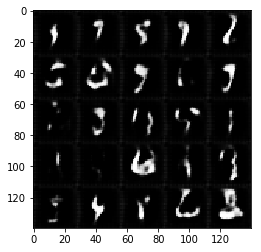

Epoch : 1/10 ... Step : 410 ... d_loss : 1.3902822732925415 ... g_loss : 1.0974254608154297
Epoch : 1/10 ... Step : 420 ... d_loss : 1.2582716941833496 ... g_loss : 1.8186759948730469
Epoch : 1/10 ... Step : 430 ... d_loss : 0.6475712060928345 ... g_loss : 1.795021414756775
Epoch : 1/10 ... Step : 440 ... d_loss : 1.4910796880722046 ... g_loss : 1.7215687036514282
Epoch : 1/10 ... Step : 450 ... d_loss : 1.0913844108581543 ... g_loss : 1.4647681713104248
Epoch : 1/10 ... Step : 460 ... d_loss : 1.2242705821990967 ... g_loss : 1.1649627685546875
Epoch : 1/10 ... Step : 470 ... d_loss : 1.4236462116241455 ... g_loss : 0.7046834230422974
Epoch : 1/10 ... Step : 480 ... d_loss : 0.9405874013900757 ... g_loss : 2.162613868713379
Epoch : 1/10 ... Step : 490 ... d_loss : 1.0616095066070557 ... g_loss : 1.5504341125488281
Epoch : 1/10 ... Step : 500 ... d_loss : 1.3162117004394531 ... g_loss : 1.145620346069336


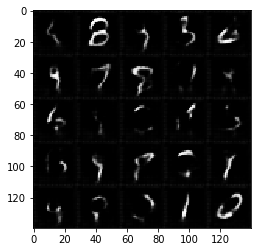

Epoch : 1/10 ... Step : 510 ... d_loss : 1.5534836053848267 ... g_loss : 3.1266019344329834
Epoch : 1/10 ... Step : 520 ... d_loss : 1.215088963508606 ... g_loss : 1.9315154552459717
Epoch : 1/10 ... Step : 530 ... d_loss : 0.7594751715660095 ... g_loss : 2.670454978942871
Epoch : 1/10 ... Step : 540 ... d_loss : 1.2115442752838135 ... g_loss : 1.1737947463989258
Epoch : 1/10 ... Step : 550 ... d_loss : 1.0982768535614014 ... g_loss : 1.9475288391113281
Epoch : 1/10 ... Step : 560 ... d_loss : 0.985558271408081 ... g_loss : 2.149923801422119
Epoch : 1/10 ... Step : 570 ... d_loss : 1.377077579498291 ... g_loss : 2.2018661499023438
Epoch : 1/10 ... Step : 580 ... d_loss : 1.1635823249816895 ... g_loss : 1.2131872177124023
Epoch : 1/10 ... Step : 590 ... d_loss : 1.6378591060638428 ... g_loss : 0.6881863474845886
Epoch : 1/10 ... Step : 600 ... d_loss : 1.069315791130066 ... g_loss : 1.434683084487915


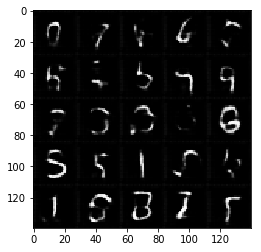

Epoch : 1/10 ... Step : 610 ... d_loss : 0.981454610824585 ... g_loss : 1.2627581357955933
Epoch : 1/10 ... Step : 620 ... d_loss : 0.9550114274024963 ... g_loss : 1.5058112144470215
Epoch : 1/10 ... Step : 630 ... d_loss : 1.2358360290527344 ... g_loss : 1.4099187850952148
Epoch : 1/10 ... Step : 640 ... d_loss : 1.3574602603912354 ... g_loss : 1.2130008935928345
Epoch : 1/10 ... Step : 650 ... d_loss : 1.4638561010360718 ... g_loss : 2.1627204418182373
Epoch : 1/10 ... Step : 660 ... d_loss : 1.1220264434814453 ... g_loss : 0.8887308835983276
Epoch : 1/10 ... Step : 670 ... d_loss : 0.9550321102142334 ... g_loss : 1.8062328100204468
Epoch : 1/10 ... Step : 680 ... d_loss : 1.0694758892059326 ... g_loss : 1.082711935043335
Epoch : 1/10 ... Step : 690 ... d_loss : 0.8675495386123657 ... g_loss : 1.212203025817871
Epoch : 1/10 ... Step : 700 ... d_loss : 0.972233772277832 ... g_loss : 2.3421599864959717


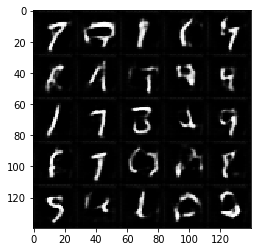

Epoch : 1/10 ... Step : 710 ... d_loss : 1.5123995542526245 ... g_loss : 0.5718293190002441
Epoch : 1/10 ... Step : 720 ... d_loss : 1.2108900547027588 ... g_loss : 1.3269786834716797
Epoch : 1/10 ... Step : 730 ... d_loss : 1.1364483833312988 ... g_loss : 1.970099925994873
Epoch : 1/10 ... Step : 740 ... d_loss : 1.2908285856246948 ... g_loss : 1.0162230730056763
Epoch : 1/10 ... Step : 750 ... d_loss : 1.2377268075942993 ... g_loss : 1.9638171195983887
Epoch : 1/10 ... Step : 760 ... d_loss : 1.143662452697754 ... g_loss : 1.3335533142089844
Epoch : 1/10 ... Step : 770 ... d_loss : 1.1149780750274658 ... g_loss : 1.0401585102081299
Epoch : 1/10 ... Step : 780 ... d_loss : 1.106640338897705 ... g_loss : 0.984778642654419
Epoch : 1/10 ... Step : 790 ... d_loss : 1.1490966081619263 ... g_loss : 1.3063712120056152
Epoch : 1/10 ... Step : 800 ... d_loss : 1.366196632385254 ... g_loss : 0.9468010663986206


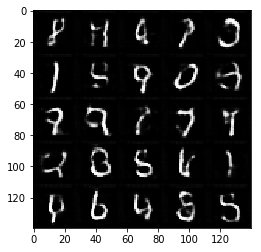

Epoch : 1/10 ... Step : 810 ... d_loss : 0.9664392471313477 ... g_loss : 1.6676493883132935
Epoch : 1/10 ... Step : 820 ... d_loss : 1.328401803970337 ... g_loss : 1.006400227546692
Epoch : 1/10 ... Step : 830 ... d_loss : 1.1378326416015625 ... g_loss : 1.4972355365753174
Epoch : 1/10 ... Step : 840 ... d_loss : 1.1448004245758057 ... g_loss : 1.1221778392791748
Epoch : 1/10 ... Step : 850 ... d_loss : 1.2182261943817139 ... g_loss : 0.622147798538208
Epoch : 1/10 ... Step : 860 ... d_loss : 0.9789124727249146 ... g_loss : 1.4772340059280396
Epoch : 1/10 ... Step : 870 ... d_loss : 1.1895695924758911 ... g_loss : 1.9336721897125244
Epoch : 1/10 ... Step : 880 ... d_loss : 1.6178090572357178 ... g_loss : 0.8947635889053345
Epoch : 1/10 ... Step : 890 ... d_loss : 1.0592341423034668 ... g_loss : 1.5290467739105225
Epoch : 1/10 ... Step : 900 ... d_loss : 1.0584006309509277 ... g_loss : 1.575523018836975


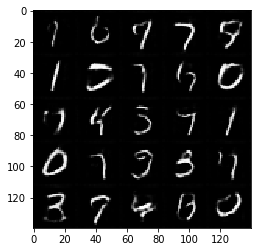

Epoch : 1/10 ... Step : 910 ... d_loss : 1.0674065351486206 ... g_loss : 1.1623165607452393
Epoch : 1/10 ... Step : 920 ... d_loss : 1.5504359006881714 ... g_loss : 0.589164674282074
Epoch : 1/10 ... Step : 930 ... d_loss : 1.1545095443725586 ... g_loss : 1.7399578094482422
Epoch : 2/10 ... Step : 940 ... d_loss : 1.1295740604400635 ... g_loss : 1.5877927541732788
Epoch : 2/10 ... Step : 950 ... d_loss : 1.0623983144760132 ... g_loss : 1.778172254562378
Epoch : 2/10 ... Step : 960 ... d_loss : 1.393015742301941 ... g_loss : 1.5293325185775757
Epoch : 2/10 ... Step : 970 ... d_loss : 1.0823380947113037 ... g_loss : 1.5688254833221436
Epoch : 2/10 ... Step : 980 ... d_loss : 1.1521884202957153 ... g_loss : 1.3556833267211914
Epoch : 2/10 ... Step : 990 ... d_loss : 1.139981985092163 ... g_loss : 1.324705719947815
Epoch : 2/10 ... Step : 1000 ... d_loss : 1.0358490943908691 ... g_loss : 1.5278619527816772


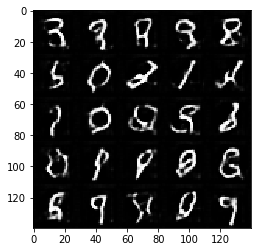

Epoch : 2/10 ... Step : 1010 ... d_loss : 1.127999186515808 ... g_loss : 1.0518853664398193
Epoch : 2/10 ... Step : 1020 ... d_loss : 1.2111785411834717 ... g_loss : 1.5922921895980835
Epoch : 2/10 ... Step : 1030 ... d_loss : 1.00851571559906 ... g_loss : 2.13020658493042
Epoch : 2/10 ... Step : 1040 ... d_loss : 0.9859018921852112 ... g_loss : 1.4437816143035889
Epoch : 2/10 ... Step : 1050 ... d_loss : 1.2572096586227417 ... g_loss : 1.1325087547302246
Epoch : 2/10 ... Step : 1060 ... d_loss : 1.1913608312606812 ... g_loss : 0.9107012748718262
Epoch : 2/10 ... Step : 1070 ... d_loss : 1.7200047969818115 ... g_loss : 0.9679047465324402
Epoch : 2/10 ... Step : 1080 ... d_loss : 1.0233430862426758 ... g_loss : 1.2773581743240356
Epoch : 2/10 ... Step : 1090 ... d_loss : 1.2773218154907227 ... g_loss : 0.9419135451316833
Epoch : 2/10 ... Step : 1100 ... d_loss : 1.1738041639328003 ... g_loss : 1.4381492137908936


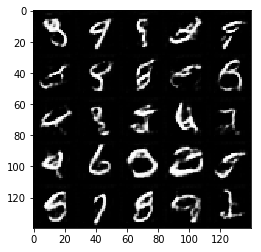

Epoch : 2/10 ... Step : 1110 ... d_loss : 1.004424810409546 ... g_loss : 1.5246293544769287
Epoch : 2/10 ... Step : 1120 ... d_loss : 1.1346442699432373 ... g_loss : 1.778740644454956
Epoch : 2/10 ... Step : 1130 ... d_loss : 1.0080586671829224 ... g_loss : 1.3214597702026367
Epoch : 2/10 ... Step : 1140 ... d_loss : 1.4084007740020752 ... g_loss : 0.6875311136245728
Epoch : 2/10 ... Step : 1150 ... d_loss : 1.0801060199737549 ... g_loss : 1.7017667293548584
Epoch : 2/10 ... Step : 1160 ... d_loss : 1.0700492858886719 ... g_loss : 1.7895833253860474
Epoch : 2/10 ... Step : 1170 ... d_loss : 1.6813910007476807 ... g_loss : 0.8599516153335571
Epoch : 2/10 ... Step : 1180 ... d_loss : 1.2089331150054932 ... g_loss : 0.8080447912216187
Epoch : 2/10 ... Step : 1190 ... d_loss : 1.1991631984710693 ... g_loss : 1.7882126569747925
Epoch : 2/10 ... Step : 1200 ... d_loss : 1.7380777597427368 ... g_loss : 0.5960829257965088


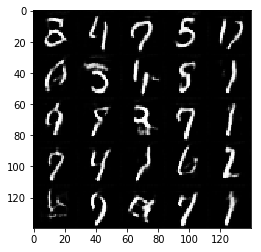

Epoch : 2/10 ... Step : 1210 ... d_loss : 1.3064088821411133 ... g_loss : 1.9030771255493164
Epoch : 2/10 ... Step : 1220 ... d_loss : 1.2310001850128174 ... g_loss : 1.0976850986480713
Epoch : 2/10 ... Step : 1230 ... d_loss : 1.382249116897583 ... g_loss : 1.0422245264053345
Epoch : 2/10 ... Step : 1240 ... d_loss : 0.7981488704681396 ... g_loss : 1.689804196357727
Epoch : 2/10 ... Step : 1250 ... d_loss : 0.8419550061225891 ... g_loss : 1.9105055332183838
Epoch : 2/10 ... Step : 1260 ... d_loss : 1.1154189109802246 ... g_loss : 1.1781072616577148
Epoch : 2/10 ... Step : 1270 ... d_loss : 1.501880168914795 ... g_loss : 0.9552478790283203
Epoch : 2/10 ... Step : 1280 ... d_loss : 0.9301193952560425 ... g_loss : 1.6169062852859497
Epoch : 2/10 ... Step : 1290 ... d_loss : 0.9719349145889282 ... g_loss : 2.0167324542999268
Epoch : 2/10 ... Step : 1300 ... d_loss : 1.0472683906555176 ... g_loss : 1.5855474472045898


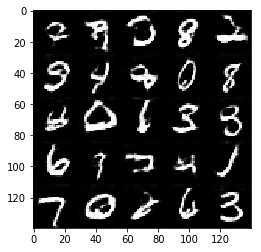

Epoch : 2/10 ... Step : 1310 ... d_loss : 1.414940595626831 ... g_loss : 1.2769718170166016
Epoch : 2/10 ... Step : 1320 ... d_loss : 1.1396784782409668 ... g_loss : 1.3639006614685059
Epoch : 2/10 ... Step : 1330 ... d_loss : 1.2170883417129517 ... g_loss : 1.2269868850708008
Epoch : 2/10 ... Step : 1340 ... d_loss : 1.3443372249603271 ... g_loss : 1.0037143230438232
Epoch : 2/10 ... Step : 1350 ... d_loss : 1.2638769149780273 ... g_loss : 0.7869760990142822
Epoch : 2/10 ... Step : 1360 ... d_loss : 1.0464050769805908 ... g_loss : 1.3401780128479004
Epoch : 2/10 ... Step : 1370 ... d_loss : 1.4237451553344727 ... g_loss : 2.565408945083618
Epoch : 2/10 ... Step : 1380 ... d_loss : 1.2127013206481934 ... g_loss : 1.5985629558563232
Epoch : 2/10 ... Step : 1390 ... d_loss : 1.0993343591690063 ... g_loss : 2.4114279747009277
Epoch : 2/10 ... Step : 1400 ... d_loss : 1.2486525774002075 ... g_loss : 1.2502981424331665


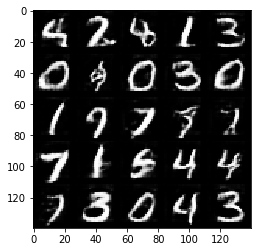

Epoch : 2/10 ... Step : 1410 ... d_loss : 1.1832139492034912 ... g_loss : 1.1019843816757202
Epoch : 2/10 ... Step : 1420 ... d_loss : 1.4321261644363403 ... g_loss : 2.482414722442627
Epoch : 2/10 ... Step : 1430 ... d_loss : 1.2298905849456787 ... g_loss : 1.5464870929718018
Epoch : 2/10 ... Step : 1440 ... d_loss : 1.2789597511291504 ... g_loss : 0.6606869101524353
Epoch : 2/10 ... Step : 1450 ... d_loss : 1.0863618850708008 ... g_loss : 1.6065963506698608
Epoch : 2/10 ... Step : 1460 ... d_loss : 1.0560640096664429 ... g_loss : 2.149266242980957
Epoch : 2/10 ... Step : 1470 ... d_loss : 1.54098379611969 ... g_loss : 0.8398396968841553
Epoch : 2/10 ... Step : 1480 ... d_loss : 1.1790307760238647 ... g_loss : 1.2146837711334229
Epoch : 2/10 ... Step : 1490 ... d_loss : 1.3291950225830078 ... g_loss : 1.704003095626831
Epoch : 2/10 ... Step : 1500 ... d_loss : 1.207222819328308 ... g_loss : 1.844398021697998


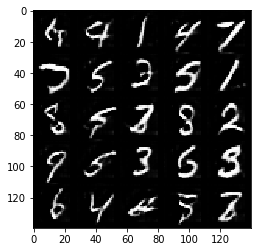

Epoch : 2/10 ... Step : 1510 ... d_loss : 1.1889419555664062 ... g_loss : 1.1030300855636597
Epoch : 2/10 ... Step : 1520 ... d_loss : 1.3184185028076172 ... g_loss : 1.450179934501648
Epoch : 2/10 ... Step : 1530 ... d_loss : 1.150858759880066 ... g_loss : 1.4198561906814575
Epoch : 2/10 ... Step : 1540 ... d_loss : 1.1129109859466553 ... g_loss : 1.5440231561660767
Epoch : 2/10 ... Step : 1550 ... d_loss : 1.1984981298446655 ... g_loss : 1.5714399814605713
Epoch : 2/10 ... Step : 1560 ... d_loss : 1.2519142627716064 ... g_loss : 1.1198105812072754
Epoch : 2/10 ... Step : 1570 ... d_loss : 1.2169337272644043 ... g_loss : 1.1415907144546509
Epoch : 2/10 ... Step : 1580 ... d_loss : 1.3273497819900513 ... g_loss : 1.1379848718643188
Epoch : 2/10 ... Step : 1590 ... d_loss : 1.2457209825515747 ... g_loss : 1.918545126914978
Epoch : 2/10 ... Step : 1600 ... d_loss : 0.9856147766113281 ... g_loss : 1.80910325050354


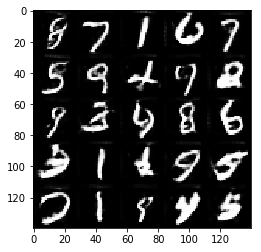

Epoch : 2/10 ... Step : 1610 ... d_loss : 1.352705717086792 ... g_loss : 0.978065550327301
Epoch : 2/10 ... Step : 1620 ... d_loss : 1.2374155521392822 ... g_loss : 1.926946997642517
Epoch : 2/10 ... Step : 1630 ... d_loss : 1.078472375869751 ... g_loss : 1.4725933074951172
Epoch : 2/10 ... Step : 1640 ... d_loss : 1.2353249788284302 ... g_loss : 1.041190505027771
Epoch : 2/10 ... Step : 1650 ... d_loss : 1.2512357234954834 ... g_loss : 1.4837450981140137
Epoch : 2/10 ... Step : 1660 ... d_loss : 1.3387495279312134 ... g_loss : 1.6691570281982422
Epoch : 2/10 ... Step : 1670 ... d_loss : 1.005256175994873 ... g_loss : 1.4894243478775024
Epoch : 2/10 ... Step : 1680 ... d_loss : 0.951962411403656 ... g_loss : 1.8118796348571777
Epoch : 2/10 ... Step : 1690 ... d_loss : 1.1595646142959595 ... g_loss : 2.2363250255584717
Epoch : 2/10 ... Step : 1700 ... d_loss : 1.2670197486877441 ... g_loss : 1.8775007724761963


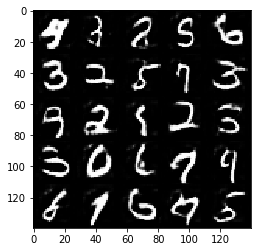

Epoch : 2/10 ... Step : 1710 ... d_loss : 1.1550359725952148 ... g_loss : 1.163494348526001
Epoch : 2/10 ... Step : 1720 ... d_loss : 1.1356055736541748 ... g_loss : 1.2087832689285278
Epoch : 2/10 ... Step : 1730 ... d_loss : 1.064755916595459 ... g_loss : 1.0785276889801025
Epoch : 2/10 ... Step : 1740 ... d_loss : 1.0251996517181396 ... g_loss : 1.4351794719696045
Epoch : 2/10 ... Step : 1750 ... d_loss : 1.1703532934188843 ... g_loss : 1.5701271295547485
Epoch : 2/10 ... Step : 1760 ... d_loss : 1.256360650062561 ... g_loss : 1.4848546981811523
Epoch : 2/10 ... Step : 1770 ... d_loss : 1.4937524795532227 ... g_loss : 0.8905854225158691
Epoch : 2/10 ... Step : 1780 ... d_loss : 1.2063204050064087 ... g_loss : 0.9594317674636841
Epoch : 2/10 ... Step : 1790 ... d_loss : 1.0657639503479004 ... g_loss : 1.1095373630523682
Epoch : 2/10 ... Step : 1800 ... d_loss : 1.0471187829971313 ... g_loss : 1.5535955429077148


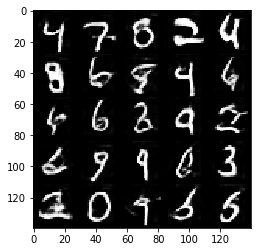

Epoch : 2/10 ... Step : 1810 ... d_loss : 1.1151962280273438 ... g_loss : 1.0250966548919678
Epoch : 2/10 ... Step : 1820 ... d_loss : 1.1930280923843384 ... g_loss : 1.4415141344070435
Epoch : 2/10 ... Step : 1830 ... d_loss : 1.3127708435058594 ... g_loss : 1.2640348672866821
Epoch : 2/10 ... Step : 1840 ... d_loss : 1.1992855072021484 ... g_loss : 1.2563024759292603
Epoch : 2/10 ... Step : 1850 ... d_loss : 1.2186381816864014 ... g_loss : 1.1356861591339111
Epoch : 2/10 ... Step : 1860 ... d_loss : 1.0208684206008911 ... g_loss : 1.763678789138794
Epoch : 2/10 ... Step : 1870 ... d_loss : 1.5432339906692505 ... g_loss : 1.176990032196045
Epoch : 3/10 ... Step : 1880 ... d_loss : 1.1664962768554688 ... g_loss : 1.2236480712890625
Epoch : 3/10 ... Step : 1890 ... d_loss : 1.032402515411377 ... g_loss : 1.871586799621582
Epoch : 3/10 ... Step : 1900 ... d_loss : 1.160961389541626 ... g_loss : 1.847566843032837


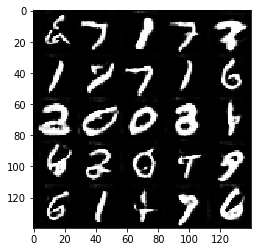

Epoch : 3/10 ... Step : 1910 ... d_loss : 1.0773367881774902 ... g_loss : 1.697385311126709
Epoch : 3/10 ... Step : 1920 ... d_loss : 1.1571096181869507 ... g_loss : 1.6232755184173584
Epoch : 3/10 ... Step : 1930 ... d_loss : 1.217759132385254 ... g_loss : 1.0994253158569336
Epoch : 3/10 ... Step : 1940 ... d_loss : 1.1723899841308594 ... g_loss : 1.3032466173171997
Epoch : 3/10 ... Step : 1950 ... d_loss : 1.3119581937789917 ... g_loss : 2.0981926918029785
Epoch : 3/10 ... Step : 1960 ... d_loss : 1.0355829000473022 ... g_loss : 1.2401044368743896
Epoch : 3/10 ... Step : 1970 ... d_loss : 1.3168139457702637 ... g_loss : 1.2186646461486816
Epoch : 3/10 ... Step : 1980 ... d_loss : 1.1328130960464478 ... g_loss : 1.1274149417877197
Epoch : 3/10 ... Step : 1990 ... d_loss : 1.1087673902511597 ... g_loss : 1.1865394115447998
Epoch : 3/10 ... Step : 2000 ... d_loss : 1.2730910778045654 ... g_loss : 1.7039010524749756


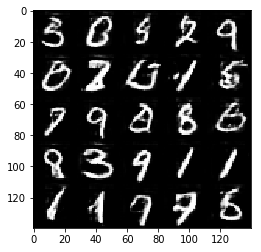

Epoch : 3/10 ... Step : 2010 ... d_loss : 1.3984098434448242 ... g_loss : 0.5735312104225159
Epoch : 3/10 ... Step : 2020 ... d_loss : 1.5873034000396729 ... g_loss : 1.0239301919937134
Epoch : 3/10 ... Step : 2030 ... d_loss : 0.968651294708252 ... g_loss : 1.51108980178833
Epoch : 3/10 ... Step : 2040 ... d_loss : 1.0467053651809692 ... g_loss : 1.1159968376159668
Epoch : 3/10 ... Step : 2050 ... d_loss : 1.1211977005004883 ... g_loss : 1.414940595626831
Epoch : 3/10 ... Step : 2060 ... d_loss : 1.1186691522598267 ... g_loss : 1.8691283464431763
Epoch : 3/10 ... Step : 2070 ... d_loss : 1.3407081365585327 ... g_loss : 2.0426440238952637
Epoch : 3/10 ... Step : 2080 ... d_loss : 1.8276371955871582 ... g_loss : 2.653937816619873
Epoch : 3/10 ... Step : 2090 ... d_loss : 1.2356929779052734 ... g_loss : 0.86915123462677
Epoch : 3/10 ... Step : 2100 ... d_loss : 1.3997421264648438 ... g_loss : 1.2469884157180786


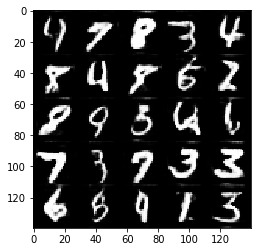

Epoch : 3/10 ... Step : 2110 ... d_loss : 1.2224493026733398 ... g_loss : 1.1358617544174194
Epoch : 3/10 ... Step : 2120 ... d_loss : 1.479903221130371 ... g_loss : 2.2949624061584473
Epoch : 3/10 ... Step : 2130 ... d_loss : 1.1823482513427734 ... g_loss : 1.3759015798568726
Epoch : 3/10 ... Step : 2140 ... d_loss : 1.3021974563598633 ... g_loss : 1.1898908615112305
Epoch : 3/10 ... Step : 2150 ... d_loss : 1.1303648948669434 ... g_loss : 1.7104313373565674
Epoch : 3/10 ... Step : 2160 ... d_loss : 1.2230631113052368 ... g_loss : 1.123307704925537
Epoch : 3/10 ... Step : 2170 ... d_loss : 0.9835249185562134 ... g_loss : 1.2685867547988892
Epoch : 3/10 ... Step : 2180 ... d_loss : 1.3786990642547607 ... g_loss : 1.1326740980148315
Epoch : 3/10 ... Step : 2190 ... d_loss : 1.4690876007080078 ... g_loss : 0.9693770408630371
Epoch : 3/10 ... Step : 2200 ... d_loss : 1.0887408256530762 ... g_loss : 1.0421311855316162


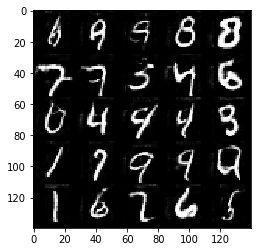

Epoch : 3/10 ... Step : 2210 ... d_loss : 1.317614197731018 ... g_loss : 1.402815580368042
Epoch : 3/10 ... Step : 2220 ... d_loss : 0.9363196492195129 ... g_loss : 1.4311853647232056
Epoch : 3/10 ... Step : 2230 ... d_loss : 1.2299728393554688 ... g_loss : 1.737912893295288
Epoch : 3/10 ... Step : 2240 ... d_loss : 1.212263584136963 ... g_loss : 1.4511406421661377
Epoch : 3/10 ... Step : 2250 ... d_loss : 1.4324625730514526 ... g_loss : 2.4294424057006836
Epoch : 3/10 ... Step : 2260 ... d_loss : 1.483644723892212 ... g_loss : 1.402132511138916
Epoch : 3/10 ... Step : 2270 ... d_loss : 1.6506860256195068 ... g_loss : 0.6052635908126831
Epoch : 3/10 ... Step : 2280 ... d_loss : 1.1589555740356445 ... g_loss : 1.0518357753753662
Epoch : 3/10 ... Step : 2290 ... d_loss : 1.1442238092422485 ... g_loss : 2.0238020420074463
Epoch : 3/10 ... Step : 2300 ... d_loss : 1.208787441253662 ... g_loss : 0.9166773557662964


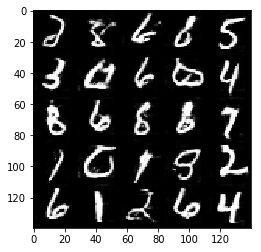

Epoch : 3/10 ... Step : 2310 ... d_loss : 1.044378399848938 ... g_loss : 1.8359558582305908
Epoch : 3/10 ... Step : 2320 ... d_loss : 1.4528954029083252 ... g_loss : 0.49202078580856323
Epoch : 3/10 ... Step : 2330 ... d_loss : 1.0535593032836914 ... g_loss : 1.1809046268463135
Epoch : 3/10 ... Step : 2340 ... d_loss : 1.0120298862457275 ... g_loss : 2.138395071029663
Epoch : 3/10 ... Step : 2350 ... d_loss : 1.404855489730835 ... g_loss : 1.0802910327911377
Epoch : 3/10 ... Step : 2360 ... d_loss : 1.1599828004837036 ... g_loss : 1.46394681930542
Epoch : 3/10 ... Step : 2370 ... d_loss : 1.1286760568618774 ... g_loss : 1.2196482419967651
Epoch : 3/10 ... Step : 2380 ... d_loss : 1.2669034004211426 ... g_loss : 1.4024899005889893
Epoch : 3/10 ... Step : 2390 ... d_loss : 0.9900571703910828 ... g_loss : 1.757796287536621
Epoch : 3/10 ... Step : 2400 ... d_loss : 1.1259201765060425 ... g_loss : 1.3481576442718506


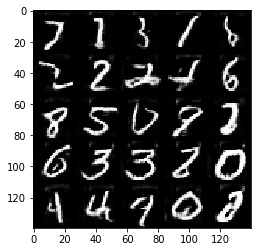

Epoch : 3/10 ... Step : 2410 ... d_loss : 1.0932637453079224 ... g_loss : 1.0945137739181519
Epoch : 3/10 ... Step : 2420 ... d_loss : 1.3416666984558105 ... g_loss : 0.9716396331787109
Epoch : 3/10 ... Step : 2430 ... d_loss : 1.3971009254455566 ... g_loss : 2.2151618003845215
Epoch : 3/10 ... Step : 2440 ... d_loss : 1.481907844543457 ... g_loss : 0.9717908501625061
Epoch : 3/10 ... Step : 2450 ... d_loss : 1.4154975414276123 ... g_loss : 1.101106882095337
Epoch : 3/10 ... Step : 2460 ... d_loss : 1.262361764907837 ... g_loss : 0.8087199330329895
Epoch : 3/10 ... Step : 2470 ... d_loss : 1.4083163738250732 ... g_loss : 0.7924072742462158
Epoch : 3/10 ... Step : 2480 ... d_loss : 1.2083778381347656 ... g_loss : 0.9232006072998047
Epoch : 3/10 ... Step : 2490 ... d_loss : 1.256584882736206 ... g_loss : 1.2403604984283447
Epoch : 3/10 ... Step : 2500 ... d_loss : 1.452804684638977 ... g_loss : 2.0332419872283936


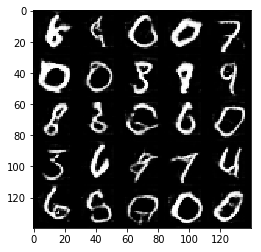

Epoch : 3/10 ... Step : 2510 ... d_loss : 1.097036361694336 ... g_loss : 1.3014765977859497
Epoch : 3/10 ... Step : 2520 ... d_loss : 1.1158359050750732 ... g_loss : 1.1356648206710815
Epoch : 3/10 ... Step : 2530 ... d_loss : 1.6866326332092285 ... g_loss : 3.0934362411499023
Epoch : 3/10 ... Step : 2540 ... d_loss : 1.2468855381011963 ... g_loss : 0.9852086305618286
Epoch : 3/10 ... Step : 2550 ... d_loss : 1.0699679851531982 ... g_loss : 2.134732961654663
Epoch : 3/10 ... Step : 2560 ... d_loss : 1.331434965133667 ... g_loss : 0.9015360474586487
Epoch : 3/10 ... Step : 2570 ... d_loss : 1.0711017847061157 ... g_loss : 1.4016947746276855
Epoch : 3/10 ... Step : 2580 ... d_loss : 1.2058120965957642 ... g_loss : 3.0915284156799316
Epoch : 3/10 ... Step : 2590 ... d_loss : 1.249732494354248 ... g_loss : 1.0268406867980957
Epoch : 3/10 ... Step : 2600 ... d_loss : 1.2337062358856201 ... g_loss : 0.9933875203132629


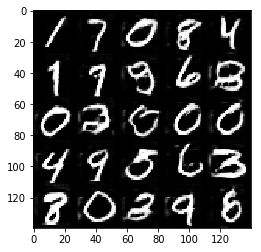

Epoch : 3/10 ... Step : 2610 ... d_loss : 1.1935145854949951 ... g_loss : 1.4357829093933105
Epoch : 3/10 ... Step : 2620 ... d_loss : 1.0387768745422363 ... g_loss : 1.3942983150482178
Epoch : 3/10 ... Step : 2630 ... d_loss : 1.102617859840393 ... g_loss : 1.0855696201324463
Epoch : 3/10 ... Step : 2640 ... d_loss : 1.2456660270690918 ... g_loss : 0.9585193395614624
Epoch : 3/10 ... Step : 2650 ... d_loss : 1.308700442314148 ... g_loss : 0.8967334628105164
Epoch : 3/10 ... Step : 2660 ... d_loss : 1.1198986768722534 ... g_loss : 1.0909645557403564
Epoch : 3/10 ... Step : 2670 ... d_loss : 1.2699940204620361 ... g_loss : 0.5696432590484619
Epoch : 3/10 ... Step : 2680 ... d_loss : 1.163609266281128 ... g_loss : 1.218977689743042
Epoch : 3/10 ... Step : 2690 ... d_loss : 1.2359609603881836 ... g_loss : 0.8924904465675354
Epoch : 3/10 ... Step : 2700 ... d_loss : 1.1443907022476196 ... g_loss : 1.3487640619277954


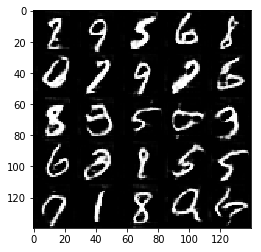

Epoch : 3/10 ... Step : 2710 ... d_loss : 1.2026607990264893 ... g_loss : 1.1530699729919434
Epoch : 3/10 ... Step : 2720 ... d_loss : 1.063374400138855 ... g_loss : 1.080735206604004
Epoch : 3/10 ... Step : 2730 ... d_loss : 1.2095377445220947 ... g_loss : 1.5972174406051636
Epoch : 3/10 ... Step : 2740 ... d_loss : 1.246632695198059 ... g_loss : 0.9586902856826782
Epoch : 3/10 ... Step : 2750 ... d_loss : 1.0834228992462158 ... g_loss : 0.9632858037948608
Epoch : 3/10 ... Step : 2760 ... d_loss : 1.037719964981079 ... g_loss : 0.952823281288147
Epoch : 3/10 ... Step : 2770 ... d_loss : 1.1972384452819824 ... g_loss : 2.1064419746398926
Epoch : 3/10 ... Step : 2780 ... d_loss : 1.4892257452011108 ... g_loss : 0.9987964034080505
Epoch : 3/10 ... Step : 2790 ... d_loss : 1.1216225624084473 ... g_loss : 1.1178511381149292
Epoch : 3/10 ... Step : 2800 ... d_loss : 0.9529563188552856 ... g_loss : 1.3459296226501465


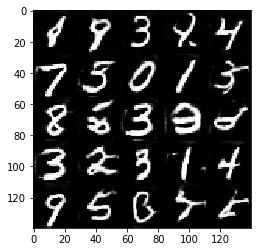

Epoch : 3/10 ... Step : 2810 ... d_loss : 1.12368643283844 ... g_loss : 1.6999194622039795
Epoch : 4/10 ... Step : 2820 ... d_loss : 1.1003479957580566 ... g_loss : 1.290784478187561
Epoch : 4/10 ... Step : 2830 ... d_loss : 1.310361623764038 ... g_loss : 1.292500376701355
Epoch : 4/10 ... Step : 2840 ... d_loss : 0.9923338890075684 ... g_loss : 1.658163070678711
Epoch : 4/10 ... Step : 2850 ... d_loss : 1.3500361442565918 ... g_loss : 0.9752824306488037
Epoch : 4/10 ... Step : 2860 ... d_loss : 0.9913690090179443 ... g_loss : 1.6020770072937012
Epoch : 4/10 ... Step : 2870 ... d_loss : 1.2557721138000488 ... g_loss : 1.4300849437713623
Epoch : 4/10 ... Step : 2880 ... d_loss : 1.0533208847045898 ... g_loss : 1.9113298654556274
Epoch : 4/10 ... Step : 2890 ... d_loss : 1.444305658340454 ... g_loss : 2.321416139602661
Epoch : 4/10 ... Step : 2900 ... d_loss : 1.2802772521972656 ... g_loss : 1.205305814743042


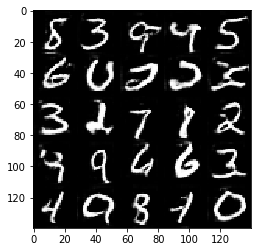

Epoch : 4/10 ... Step : 2910 ... d_loss : 1.5609034299850464 ... g_loss : 2.988319158554077
Epoch : 4/10 ... Step : 2920 ... d_loss : 1.6492888927459717 ... g_loss : 1.5691949129104614
Epoch : 4/10 ... Step : 2930 ... d_loss : 1.1959855556488037 ... g_loss : 1.2170578241348267
Epoch : 4/10 ... Step : 2940 ... d_loss : 1.1645584106445312 ... g_loss : 1.3623381853103638
Epoch : 4/10 ... Step : 2950 ... d_loss : 1.1586562395095825 ... g_loss : 1.3944209814071655
Epoch : 4/10 ... Step : 2960 ... d_loss : 1.1173800230026245 ... g_loss : 1.522286295890808
Epoch : 4/10 ... Step : 2970 ... d_loss : 1.1704776287078857 ... g_loss : 1.7404917478561401
Epoch : 4/10 ... Step : 2980 ... d_loss : 1.0406997203826904 ... g_loss : 1.0114612579345703
Epoch : 4/10 ... Step : 2990 ... d_loss : 1.1510090827941895 ... g_loss : 1.0918688774108887
Epoch : 4/10 ... Step : 3000 ... d_loss : 1.1647913455963135 ... g_loss : 1.371922492980957


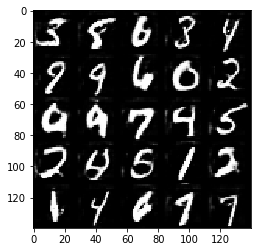

Epoch : 4/10 ... Step : 3010 ... d_loss : 1.3144242763519287 ... g_loss : 1.2386345863342285
Epoch : 4/10 ... Step : 3020 ... d_loss : 1.2151676416397095 ... g_loss : 1.0264266729354858
Epoch : 4/10 ... Step : 3030 ... d_loss : 1.1210618019104004 ... g_loss : 2.177212715148926
Epoch : 4/10 ... Step : 3040 ... d_loss : 1.1682820320129395 ... g_loss : 1.9757413864135742
Epoch : 4/10 ... Step : 3050 ... d_loss : 1.2281867265701294 ... g_loss : 1.8506028652191162
Epoch : 4/10 ... Step : 3060 ... d_loss : 1.488213062286377 ... g_loss : 1.344478726387024
Epoch : 4/10 ... Step : 3070 ... d_loss : 1.058509349822998 ... g_loss : 1.6187137365341187
Epoch : 4/10 ... Step : 3080 ... d_loss : 1.1627652645111084 ... g_loss : 1.734582543373108
Epoch : 4/10 ... Step : 3090 ... d_loss : 1.4128313064575195 ... g_loss : 1.36989426612854
Epoch : 4/10 ... Step : 3100 ... d_loss : 1.1376370191574097 ... g_loss : 1.9473793506622314


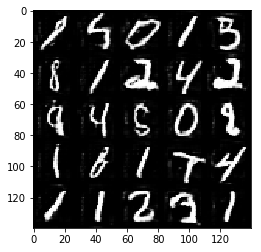

Epoch : 4/10 ... Step : 3110 ... d_loss : 1.0183771848678589 ... g_loss : 1.4959208965301514
Epoch : 4/10 ... Step : 3120 ... d_loss : 1.080994725227356 ... g_loss : 1.2871367931365967
Epoch : 4/10 ... Step : 3130 ... d_loss : 1.110095739364624 ... g_loss : 1.193698525428772
Epoch : 4/10 ... Step : 3140 ... d_loss : 1.0772607326507568 ... g_loss : 1.449489712715149
Epoch : 4/10 ... Step : 3150 ... d_loss : 1.1045753955841064 ... g_loss : 1.3022409677505493
Epoch : 4/10 ... Step : 3160 ... d_loss : 1.5784610509872437 ... g_loss : 0.8295382261276245
Epoch : 4/10 ... Step : 3170 ... d_loss : 1.055715799331665 ... g_loss : 1.3824241161346436
Epoch : 4/10 ... Step : 3180 ... d_loss : 1.2501766681671143 ... g_loss : 1.2568674087524414
Epoch : 4/10 ... Step : 3190 ... d_loss : 1.3546372652053833 ... g_loss : 0.9521654844284058
Epoch : 4/10 ... Step : 3200 ... d_loss : 0.9840964078903198 ... g_loss : 1.2682461738586426


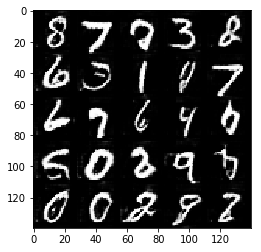

Epoch : 4/10 ... Step : 3210 ... d_loss : 1.1749567985534668 ... g_loss : 1.6322003602981567
Epoch : 4/10 ... Step : 3220 ... d_loss : 1.186346411705017 ... g_loss : 1.984321117401123
Epoch : 4/10 ... Step : 3230 ... d_loss : 0.9987046718597412 ... g_loss : 1.359614372253418
Epoch : 4/10 ... Step : 3240 ... d_loss : 0.8631823062896729 ... g_loss : 1.3517637252807617
Epoch : 4/10 ... Step : 3250 ... d_loss : 1.2870421409606934 ... g_loss : 1.0846617221832275
Epoch : 4/10 ... Step : 3260 ... d_loss : 0.9637365937232971 ... g_loss : 1.7414438724517822
Epoch : 4/10 ... Step : 3270 ... d_loss : 1.3618786334991455 ... g_loss : 1.700645923614502
Epoch : 4/10 ... Step : 3280 ... d_loss : 1.0474942922592163 ... g_loss : 1.9306042194366455
Epoch : 4/10 ... Step : 3290 ... d_loss : 0.98578941822052 ... g_loss : 1.42930006980896
Epoch : 4/10 ... Step : 3300 ... d_loss : 1.1161999702453613 ... g_loss : 1.1584742069244385


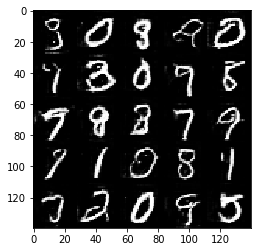

Epoch : 4/10 ... Step : 3310 ... d_loss : 0.9204412698745728 ... g_loss : 1.6930716037750244
Epoch : 4/10 ... Step : 3320 ... d_loss : 1.1568403244018555 ... g_loss : 1.0470139980316162
Epoch : 4/10 ... Step : 3330 ... d_loss : 1.0918515920639038 ... g_loss : 1.419869065284729
Epoch : 4/10 ... Step : 3340 ... d_loss : 1.5133661031723022 ... g_loss : 0.6265603303909302
Epoch : 4/10 ... Step : 3350 ... d_loss : 1.0839585065841675 ... g_loss : 1.5207691192626953
Epoch : 4/10 ... Step : 3360 ... d_loss : 1.0448215007781982 ... g_loss : 1.6313555240631104
Epoch : 4/10 ... Step : 3370 ... d_loss : 1.2486796379089355 ... g_loss : 0.8001602292060852
Epoch : 4/10 ... Step : 3380 ... d_loss : 1.2274904251098633 ... g_loss : 1.0692808628082275
Epoch : 4/10 ... Step : 3390 ... d_loss : 1.168823003768921 ... g_loss : 1.2593458890914917
Epoch : 4/10 ... Step : 3400 ... d_loss : 1.083191156387329 ... g_loss : 1.5036635398864746


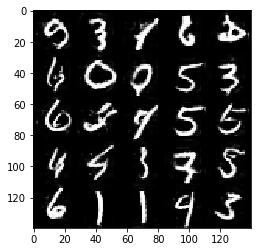

Epoch : 4/10 ... Step : 3410 ... d_loss : 1.3725930452346802 ... g_loss : 0.8256415724754333
Epoch : 4/10 ... Step : 3420 ... d_loss : 1.0666755437850952 ... g_loss : 1.453832983970642
Epoch : 4/10 ... Step : 3430 ... d_loss : 1.3412333726882935 ... g_loss : 0.9559847116470337
Epoch : 4/10 ... Step : 3440 ... d_loss : 1.1939198970794678 ... g_loss : 1.0662028789520264
Epoch : 4/10 ... Step : 3450 ... d_loss : 1.0462757349014282 ... g_loss : 1.7999969720840454
Epoch : 4/10 ... Step : 3460 ... d_loss : 1.1773943901062012 ... g_loss : 0.7386095523834229
Epoch : 4/10 ... Step : 3470 ... d_loss : 0.9305846691131592 ... g_loss : 0.7863802909851074
Epoch : 4/10 ... Step : 3480 ... d_loss : 1.2156479358673096 ... g_loss : 1.004773497581482
Epoch : 4/10 ... Step : 3490 ... d_loss : 1.0766600370407104 ... g_loss : 1.8045144081115723
Epoch : 4/10 ... Step : 3500 ... d_loss : 1.2330899238586426 ... g_loss : 0.9234230518341064


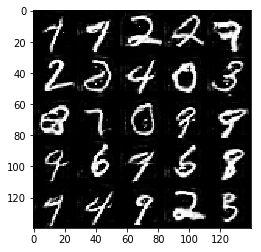

Epoch : 4/10 ... Step : 3510 ... d_loss : 0.9947789907455444 ... g_loss : 1.6667065620422363
Epoch : 4/10 ... Step : 3520 ... d_loss : 0.8539522290229797 ... g_loss : 2.001527786254883
Epoch : 4/10 ... Step : 3530 ... d_loss : 1.205406904220581 ... g_loss : 1.7086766958236694
Epoch : 4/10 ... Step : 3540 ... d_loss : 1.2167763710021973 ... g_loss : 1.143404483795166
Epoch : 4/10 ... Step : 3550 ... d_loss : 1.2275073528289795 ... g_loss : 1.3339769840240479
Epoch : 4/10 ... Step : 3560 ... d_loss : 1.2258098125457764 ... g_loss : 1.414306640625
Epoch : 4/10 ... Step : 3570 ... d_loss : 1.205418586730957 ... g_loss : 1.2442597150802612
Epoch : 4/10 ... Step : 3580 ... d_loss : 1.3438143730163574 ... g_loss : 1.9268908500671387
Epoch : 4/10 ... Step : 3590 ... d_loss : 1.1052221059799194 ... g_loss : 1.2962557077407837
Epoch : 4/10 ... Step : 3600 ... d_loss : 1.4083818197250366 ... g_loss : 0.9345992803573608


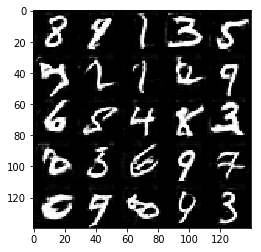

Epoch : 4/10 ... Step : 3610 ... d_loss : 1.2223920822143555 ... g_loss : 0.9481640458106995
Epoch : 4/10 ... Step : 3620 ... d_loss : 1.2056076526641846 ... g_loss : 2.0771279335021973
Epoch : 4/10 ... Step : 3630 ... d_loss : 1.1186167001724243 ... g_loss : 1.0113195180892944
Epoch : 4/10 ... Step : 3640 ... d_loss : 1.0462850332260132 ... g_loss : 1.3087202310562134
Epoch : 4/10 ... Step : 3650 ... d_loss : 0.973158061504364 ... g_loss : 1.962560772895813
Epoch : 4/10 ... Step : 3660 ... d_loss : 1.110510230064392 ... g_loss : 1.5382297039031982
Epoch : 4/10 ... Step : 3670 ... d_loss : 1.3046989440917969 ... g_loss : 1.8534953594207764
Epoch : 4/10 ... Step : 3680 ... d_loss : 0.9381080269813538 ... g_loss : 1.7727415561676025
Epoch : 4/10 ... Step : 3690 ... d_loss : 1.0105972290039062 ... g_loss : 1.5017521381378174
Epoch : 4/10 ... Step : 3700 ... d_loss : 1.0641491413116455 ... g_loss : 1.1731295585632324


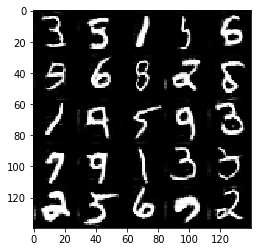

Epoch : 4/10 ... Step : 3710 ... d_loss : 0.9144504070281982 ... g_loss : 1.964490294456482
Epoch : 4/10 ... Step : 3720 ... d_loss : 0.902079164981842 ... g_loss : 1.479091763496399
Epoch : 4/10 ... Step : 3730 ... d_loss : 1.0704216957092285 ... g_loss : 1.4315001964569092
Epoch : 4/10 ... Step : 3740 ... d_loss : 1.4054081439971924 ... g_loss : 2.314324140548706
Epoch : 5/10 ... Step : 3750 ... d_loss : 1.1351113319396973 ... g_loss : 1.6551560163497925
Epoch : 5/10 ... Step : 3760 ... d_loss : 1.1309608221054077 ... g_loss : 1.321662425994873
Epoch : 5/10 ... Step : 3770 ... d_loss : 1.6844769716262817 ... g_loss : 0.964126706123352
Epoch : 5/10 ... Step : 3780 ... d_loss : 1.1125826835632324 ... g_loss : 1.813020944595337
Epoch : 5/10 ... Step : 3790 ... d_loss : 1.1632184982299805 ... g_loss : 1.9257524013519287
Epoch : 5/10 ... Step : 3800 ... d_loss : 1.0407159328460693 ... g_loss : 1.4612390995025635


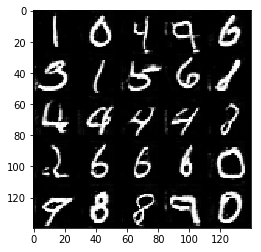

Epoch : 5/10 ... Step : 3810 ... d_loss : 1.1320558786392212 ... g_loss : 1.5992608070373535
Epoch : 5/10 ... Step : 3820 ... d_loss : 0.960599958896637 ... g_loss : 1.5279433727264404
Epoch : 5/10 ... Step : 3830 ... d_loss : 1.0803158283233643 ... g_loss : 1.412678837776184
Epoch : 5/10 ... Step : 3840 ... d_loss : 0.8447970151901245 ... g_loss : 1.9955930709838867
Epoch : 5/10 ... Step : 3850 ... d_loss : 1.057390809059143 ... g_loss : 1.0864510536193848
Epoch : 5/10 ... Step : 3860 ... d_loss : 1.0420504808425903 ... g_loss : 2.261904239654541
Epoch : 5/10 ... Step : 3870 ... d_loss : 1.060326337814331 ... g_loss : 1.928246259689331
Epoch : 5/10 ... Step : 3880 ... d_loss : 1.3150910139083862 ... g_loss : 1.5711033344268799
Epoch : 5/10 ... Step : 3890 ... d_loss : 1.0907737016677856 ... g_loss : 1.2625539302825928
Epoch : 5/10 ... Step : 3900 ... d_loss : 0.9628502130508423 ... g_loss : 1.1514848470687866


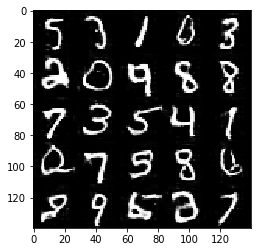

Epoch : 5/10 ... Step : 3910 ... d_loss : 1.0735185146331787 ... g_loss : 2.0743067264556885
Epoch : 5/10 ... Step : 3920 ... d_loss : 1.1483690738677979 ... g_loss : 0.853025496006012
Epoch : 5/10 ... Step : 3930 ... d_loss : 1.4972383975982666 ... g_loss : 0.7796820998191833
Epoch : 5/10 ... Step : 3940 ... d_loss : 1.0174674987792969 ... g_loss : 0.7341784834861755
Epoch : 5/10 ... Step : 3950 ... d_loss : 1.068892478942871 ... g_loss : 0.8403626680374146
Epoch : 5/10 ... Step : 3960 ... d_loss : 1.318579912185669 ... g_loss : 1.1324717998504639
Epoch : 5/10 ... Step : 3970 ... d_loss : 1.2881358861923218 ... g_loss : 1.180407166481018
Epoch : 5/10 ... Step : 3980 ... d_loss : 0.7525709867477417 ... g_loss : 1.600217580795288
Epoch : 5/10 ... Step : 3990 ... d_loss : 1.1682214736938477 ... g_loss : 1.038478970527649
Epoch : 5/10 ... Step : 4000 ... d_loss : 1.6458061933517456 ... g_loss : 2.0724496841430664


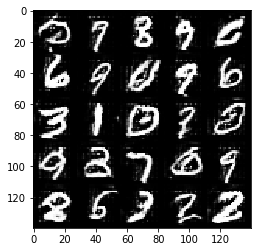

Epoch : 5/10 ... Step : 4010 ... d_loss : 1.1951812505722046 ... g_loss : 1.6149787902832031
Epoch : 5/10 ... Step : 4020 ... d_loss : 1.2207026481628418 ... g_loss : 1.807974934577942
Epoch : 5/10 ... Step : 4030 ... d_loss : 1.5337917804718018 ... g_loss : 2.388345241546631
Epoch : 5/10 ... Step : 4040 ... d_loss : 1.0304304361343384 ... g_loss : 1.516756296157837
Epoch : 5/10 ... Step : 4050 ... d_loss : 0.9118832349777222 ... g_loss : 1.324059009552002
Epoch : 5/10 ... Step : 4060 ... d_loss : 0.7311300039291382 ... g_loss : 1.8004977703094482
Epoch : 5/10 ... Step : 4070 ... d_loss : 1.2235182523727417 ... g_loss : 1.7322417497634888
Epoch : 5/10 ... Step : 4080 ... d_loss : 1.1652565002441406 ... g_loss : 1.316563606262207
Epoch : 5/10 ... Step : 4090 ... d_loss : 1.121212124824524 ... g_loss : 1.581315040588379
Epoch : 5/10 ... Step : 4100 ... d_loss : 1.6342864036560059 ... g_loss : 1.3258225917816162


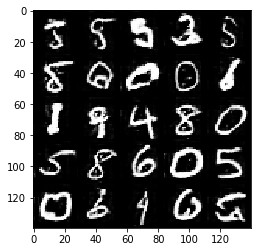

Epoch : 5/10 ... Step : 4110 ... d_loss : 1.3577079772949219 ... g_loss : 1.4717609882354736
Epoch : 5/10 ... Step : 4120 ... d_loss : 1.2737733125686646 ... g_loss : 1.34730064868927
Epoch : 5/10 ... Step : 4130 ... d_loss : 1.4117809534072876 ... g_loss : 1.014725685119629
Epoch : 5/10 ... Step : 4140 ... d_loss : 1.0784329175949097 ... g_loss : 1.6046653985977173
Epoch : 5/10 ... Step : 4150 ... d_loss : 1.4311274290084839 ... g_loss : 0.6740962266921997
Epoch : 5/10 ... Step : 4160 ... d_loss : 1.1337318420410156 ... g_loss : 1.5254478454589844
Epoch : 5/10 ... Step : 4170 ... d_loss : 1.198068380355835 ... g_loss : 1.6045148372650146
Epoch : 5/10 ... Step : 4180 ... d_loss : 1.5567421913146973 ... g_loss : 1.2056832313537598
Epoch : 5/10 ... Step : 4190 ... d_loss : 1.2124426364898682 ... g_loss : 1.108224868774414
Epoch : 5/10 ... Step : 4200 ... d_loss : 1.2484703063964844 ... g_loss : 0.989276111125946


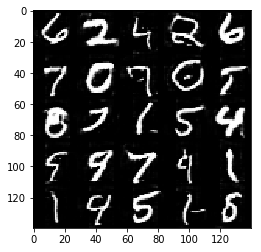

Epoch : 5/10 ... Step : 4210 ... d_loss : 1.2178064584732056 ... g_loss : 2.000558614730835
Epoch : 5/10 ... Step : 4220 ... d_loss : 1.2136061191558838 ... g_loss : 1.5060330629348755
Epoch : 5/10 ... Step : 4230 ... d_loss : 1.2998521327972412 ... g_loss : 1.015059471130371
Epoch : 5/10 ... Step : 4240 ... d_loss : 1.3000717163085938 ... g_loss : 1.1167590618133545
Epoch : 5/10 ... Step : 4250 ... d_loss : 1.161198616027832 ... g_loss : 1.9097082614898682
Epoch : 5/10 ... Step : 4260 ... d_loss : 1.0805470943450928 ... g_loss : 1.8491721153259277
Epoch : 5/10 ... Step : 4270 ... d_loss : 1.0125813484191895 ... g_loss : 1.0602657794952393
Epoch : 5/10 ... Step : 4280 ... d_loss : 1.3472630977630615 ... g_loss : 1.7432541847229004
Epoch : 5/10 ... Step : 4290 ... d_loss : 1.3453035354614258 ... g_loss : 1.3750921487808228
Epoch : 5/10 ... Step : 4300 ... d_loss : 0.9037718772888184 ... g_loss : 1.3446357250213623


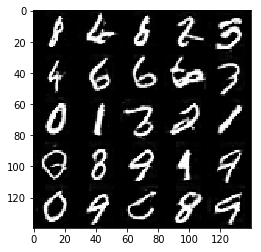

Epoch : 5/10 ... Step : 4310 ... d_loss : 1.2294738292694092 ... g_loss : 0.8951800465583801
Epoch : 5/10 ... Step : 4320 ... d_loss : 1.3112974166870117 ... g_loss : 1.272510290145874
Epoch : 5/10 ... Step : 4330 ... d_loss : 0.9756529331207275 ... g_loss : 1.61820650100708
Epoch : 5/10 ... Step : 4340 ... d_loss : 1.242995262145996 ... g_loss : 1.8041996955871582
Epoch : 5/10 ... Step : 4350 ... d_loss : 1.4083771705627441 ... g_loss : 0.7741488218307495
Epoch : 5/10 ... Step : 4360 ... d_loss : 1.0519465208053589 ... g_loss : 1.4097687005996704
Epoch : 5/10 ... Step : 4370 ... d_loss : 0.9721148610115051 ... g_loss : 1.4492446184158325
Epoch : 5/10 ... Step : 4380 ... d_loss : 1.5906466245651245 ... g_loss : 0.7245706915855408
Epoch : 5/10 ... Step : 4390 ... d_loss : 0.9078875184059143 ... g_loss : 1.8953262567520142
Epoch : 5/10 ... Step : 4400 ... d_loss : 1.4011846780776978 ... g_loss : 1.1291019916534424


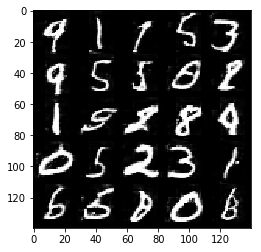

Epoch : 5/10 ... Step : 4410 ... d_loss : 1.2144122123718262 ... g_loss : 1.851470947265625
Epoch : 5/10 ... Step : 4420 ... d_loss : 1.489068627357483 ... g_loss : 0.677780032157898
Epoch : 5/10 ... Step : 4430 ... d_loss : 1.1455552577972412 ... g_loss : 1.3820751905441284
Epoch : 5/10 ... Step : 4440 ... d_loss : 1.3003630638122559 ... g_loss : 1.0916672945022583
Epoch : 5/10 ... Step : 4450 ... d_loss : 1.2861919403076172 ... g_loss : 1.1560499668121338
Epoch : 5/10 ... Step : 4460 ... d_loss : 1.2415096759796143 ... g_loss : 1.1082210540771484
Epoch : 5/10 ... Step : 4470 ... d_loss : 1.234130620956421 ... g_loss : 1.3771727085113525
Epoch : 5/10 ... Step : 4480 ... d_loss : 1.0475561618804932 ... g_loss : 1.335222840309143
Epoch : 5/10 ... Step : 4490 ... d_loss : 1.1463791131973267 ... g_loss : 1.8674378395080566
Epoch : 5/10 ... Step : 4500 ... d_loss : 1.3370156288146973 ... g_loss : 1.450709581375122


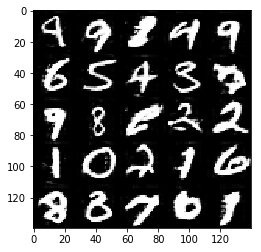

Epoch : 5/10 ... Step : 4510 ... d_loss : 1.2312363386154175 ... g_loss : 1.0322725772857666
Epoch : 5/10 ... Step : 4520 ... d_loss : 1.8775184154510498 ... g_loss : 0.4252892732620239
Epoch : 5/10 ... Step : 4530 ... d_loss : 0.6043851375579834 ... g_loss : 2.041299819946289
Epoch : 5/10 ... Step : 4540 ... d_loss : 0.8955265879631042 ... g_loss : 1.9266372919082642
Epoch : 5/10 ... Step : 4550 ... d_loss : 0.9400730729103088 ... g_loss : 1.5646315813064575
Epoch : 5/10 ... Step : 4560 ... d_loss : 1.360746145248413 ... g_loss : 1.0978374481201172
Epoch : 5/10 ... Step : 4570 ... d_loss : 1.14296293258667 ... g_loss : 1.3488283157348633
Epoch : 5/10 ... Step : 4580 ... d_loss : 0.8413193225860596 ... g_loss : 2.1000730991363525
Epoch : 5/10 ... Step : 4590 ... d_loss : 1.0938998460769653 ... g_loss : 1.341573715209961
Epoch : 5/10 ... Step : 4600 ... d_loss : 1.179610013961792 ... g_loss : 1.5057318210601807


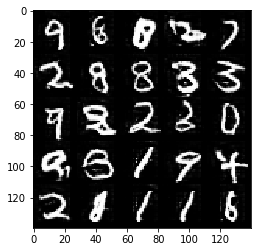

Epoch : 5/10 ... Step : 4610 ... d_loss : 1.3808156251907349 ... g_loss : 2.022395610809326
Epoch : 5/10 ... Step : 4620 ... d_loss : 1.040360927581787 ... g_loss : 1.458240270614624
Epoch : 5/10 ... Step : 4630 ... d_loss : 1.3758373260498047 ... g_loss : 1.086249589920044
Epoch : 5/10 ... Step : 4640 ... d_loss : 1.6417168378829956 ... g_loss : 2.324004888534546
Epoch : 5/10 ... Step : 4650 ... d_loss : 1.6377586126327515 ... g_loss : 0.7698981165885925
Epoch : 5/10 ... Step : 4660 ... d_loss : 1.399678111076355 ... g_loss : 1.8550806045532227
Epoch : 5/10 ... Step : 4670 ... d_loss : 1.28873872756958 ... g_loss : 1.6835265159606934
Epoch : 5/10 ... Step : 4680 ... d_loss : 1.4821250438690186 ... g_loss : 1.3306114673614502
Epoch : 6/10 ... Step : 4690 ... d_loss : 1.0666543245315552 ... g_loss : 1.627845048904419
Epoch : 6/10 ... Step : 4700 ... d_loss : 1.2027864456176758 ... g_loss : 1.8025953769683838


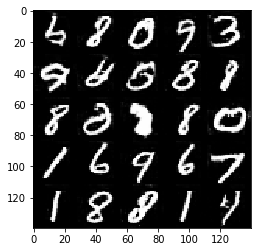

Epoch : 6/10 ... Step : 4710 ... d_loss : 1.161236047744751 ... g_loss : 1.3274668455123901
Epoch : 6/10 ... Step : 4720 ... d_loss : 1.0496915578842163 ... g_loss : 1.9212560653686523
Epoch : 6/10 ... Step : 4730 ... d_loss : 1.4475817680358887 ... g_loss : 1.4255424737930298
Epoch : 6/10 ... Step : 4740 ... d_loss : 1.1460566520690918 ... g_loss : 1.340791940689087
Epoch : 6/10 ... Step : 4750 ... d_loss : 1.2172788381576538 ... g_loss : 0.9522048830986023
Epoch : 6/10 ... Step : 4760 ... d_loss : 1.000854730606079 ... g_loss : 1.3548195362091064
Epoch : 6/10 ... Step : 4770 ... d_loss : 1.125306248664856 ... g_loss : 1.286686897277832
Epoch : 6/10 ... Step : 4780 ... d_loss : 1.2384371757507324 ... g_loss : 0.9861749410629272
Epoch : 6/10 ... Step : 4790 ... d_loss : 0.8792784214019775 ... g_loss : 1.2351078987121582
Epoch : 6/10 ... Step : 4800 ... d_loss : 1.097346544265747 ... g_loss : 2.12446928024292


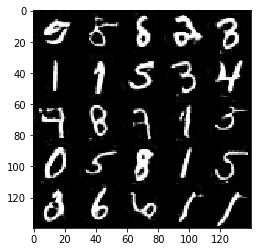

Epoch : 6/10 ... Step : 4810 ... d_loss : 1.3335585594177246 ... g_loss : 1.0295557975769043
Epoch : 6/10 ... Step : 4820 ... d_loss : 1.4412273168563843 ... g_loss : 0.9489277005195618
Epoch : 6/10 ... Step : 4830 ... d_loss : 1.2249231338500977 ... g_loss : 1.5035901069641113
Epoch : 6/10 ... Step : 4840 ... d_loss : 1.1777375936508179 ... g_loss : 1.3694658279418945
Epoch : 6/10 ... Step : 4850 ... d_loss : 1.4250186681747437 ... g_loss : 1.8158740997314453
Epoch : 6/10 ... Step : 4860 ... d_loss : 1.15791916847229 ... g_loss : 1.195531964302063
Epoch : 6/10 ... Step : 4870 ... d_loss : 1.3447279930114746 ... g_loss : 1.586000680923462
Epoch : 6/10 ... Step : 4880 ... d_loss : 1.1726858615875244 ... g_loss : 0.9827534556388855
Epoch : 6/10 ... Step : 4890 ... d_loss : 1.5328330993652344 ... g_loss : 0.7186210751533508
Epoch : 6/10 ... Step : 4900 ... d_loss : 1.306298851966858 ... g_loss : 0.9298833012580872


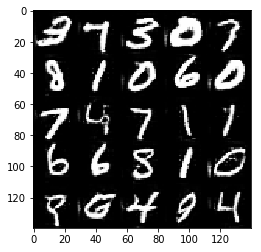

Epoch : 6/10 ... Step : 4910 ... d_loss : 1.3620189428329468 ... g_loss : 1.5062611103057861
Epoch : 6/10 ... Step : 4920 ... d_loss : 1.501788854598999 ... g_loss : 1.8624286651611328
Epoch : 6/10 ... Step : 4930 ... d_loss : 0.9283409714698792 ... g_loss : 1.4188439846038818
Epoch : 6/10 ... Step : 4940 ... d_loss : 1.1620433330535889 ... g_loss : 1.3355648517608643
Epoch : 6/10 ... Step : 4950 ... d_loss : 1.3294099569320679 ... g_loss : 1.0394055843353271
Epoch : 6/10 ... Step : 4960 ... d_loss : 0.9805019497871399 ... g_loss : 1.5739244222640991
Epoch : 6/10 ... Step : 4970 ... d_loss : 1.0443115234375 ... g_loss : 1.3595244884490967
Epoch : 6/10 ... Step : 4980 ... d_loss : 1.1420714855194092 ... g_loss : 2.3571255207061768
Epoch : 6/10 ... Step : 4990 ... d_loss : 1.45370614528656 ... g_loss : 2.186786651611328
Epoch : 6/10 ... Step : 5000 ... d_loss : 0.728531002998352 ... g_loss : 1.9070320129394531


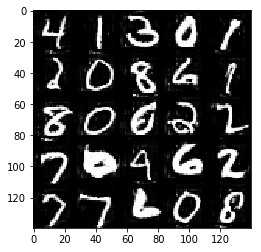

Epoch : 6/10 ... Step : 5010 ... d_loss : 0.927251935005188 ... g_loss : 1.5943255424499512
Epoch : 6/10 ... Step : 5020 ... d_loss : 1.1451520919799805 ... g_loss : 1.8558443784713745
Epoch : 6/10 ... Step : 5030 ... d_loss : 1.1810259819030762 ... g_loss : 2.047107696533203
Epoch : 6/10 ... Step : 5040 ... d_loss : 0.9445623755455017 ... g_loss : 1.109224796295166
Epoch : 6/10 ... Step : 5050 ... d_loss : 1.1562814712524414 ... g_loss : 1.7338218688964844
Epoch : 6/10 ... Step : 5060 ... d_loss : 1.3913724422454834 ... g_loss : 0.7154562473297119
Epoch : 6/10 ... Step : 5070 ... d_loss : 1.133072018623352 ... g_loss : 1.7306771278381348
Epoch : 6/10 ... Step : 5080 ... d_loss : 1.168710470199585 ... g_loss : 1.5634875297546387
Epoch : 6/10 ... Step : 5090 ... d_loss : 1.3641679286956787 ... g_loss : 0.8581437468528748
Epoch : 6/10 ... Step : 5100 ... d_loss : 0.965987503528595 ... g_loss : 1.9134938716888428


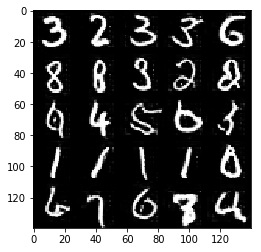

Epoch : 6/10 ... Step : 5110 ... d_loss : 1.3117611408233643 ... g_loss : 1.2772889137268066
Epoch : 6/10 ... Step : 5120 ... d_loss : 1.1831320524215698 ... g_loss : 1.040431022644043
Epoch : 6/10 ... Step : 5130 ... d_loss : 1.0018458366394043 ... g_loss : 1.4891817569732666
Epoch : 6/10 ... Step : 5140 ... d_loss : 1.3826649188995361 ... g_loss : 1.959132432937622
Epoch : 6/10 ... Step : 5150 ... d_loss : 1.4519133567810059 ... g_loss : 1.1519153118133545
Epoch : 6/10 ... Step : 5160 ... d_loss : 1.2734498977661133 ... g_loss : 1.3660409450531006
Epoch : 6/10 ... Step : 5170 ... d_loss : 1.1587235927581787 ... g_loss : 1.2607735395431519
Epoch : 6/10 ... Step : 5180 ... d_loss : 1.0214911699295044 ... g_loss : 1.3021583557128906
Epoch : 6/10 ... Step : 5190 ... d_loss : 1.3463085889816284 ... g_loss : 0.6820085048675537
Epoch : 6/10 ... Step : 5200 ... d_loss : 1.0723925828933716 ... g_loss : 1.3560478687286377


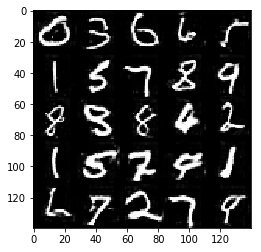

Epoch : 6/10 ... Step : 5210 ... d_loss : 1.2748143672943115 ... g_loss : 1.3131747245788574
Epoch : 6/10 ... Step : 5220 ... d_loss : 1.3434944152832031 ... g_loss : 1.7250761985778809
Epoch : 6/10 ... Step : 5230 ... d_loss : 1.226786732673645 ... g_loss : 1.9925484657287598
Epoch : 6/10 ... Step : 5240 ... d_loss : 0.9713851809501648 ... g_loss : 1.362825870513916
Epoch : 6/10 ... Step : 5250 ... d_loss : 1.3529651165008545 ... g_loss : 0.8674288988113403
Epoch : 6/10 ... Step : 5260 ... d_loss : 1.3189795017242432 ... g_loss : 2.058363914489746
Epoch : 6/10 ... Step : 5270 ... d_loss : 0.873446524143219 ... g_loss : 1.7207871675491333
Epoch : 6/10 ... Step : 5280 ... d_loss : 1.3168847560882568 ... g_loss : 1.1328895092010498
Epoch : 6/10 ... Step : 5290 ... d_loss : 1.043957233428955 ... g_loss : 1.4925496578216553
Epoch : 6/10 ... Step : 5300 ... d_loss : 1.0988670587539673 ... g_loss : 1.4139569997787476


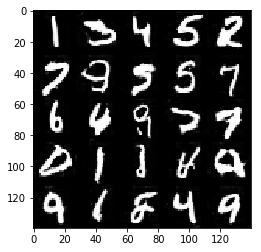

Epoch : 6/10 ... Step : 5310 ... d_loss : 1.4215843677520752 ... g_loss : 0.8526285886764526
Epoch : 6/10 ... Step : 5320 ... d_loss : 1.1741948127746582 ... g_loss : 1.4361588954925537
Epoch : 6/10 ... Step : 5330 ... d_loss : 1.2467480897903442 ... g_loss : 2.1188395023345947
Epoch : 6/10 ... Step : 5340 ... d_loss : 1.2201695442199707 ... g_loss : 1.094010829925537
Epoch : 6/10 ... Step : 5350 ... d_loss : 1.0995597839355469 ... g_loss : 1.415473222732544
Epoch : 6/10 ... Step : 5360 ... d_loss : 1.542679786682129 ... g_loss : 0.8594748973846436
Epoch : 6/10 ... Step : 5370 ... d_loss : 1.0275993347167969 ... g_loss : 2.157925844192505
Epoch : 6/10 ... Step : 5380 ... d_loss : 1.246649980545044 ... g_loss : 1.047468900680542
Epoch : 6/10 ... Step : 5390 ... d_loss : 1.117168664932251 ... g_loss : 1.176611304283142
Epoch : 6/10 ... Step : 5400 ... d_loss : 1.1469327211380005 ... g_loss : 1.1807024478912354


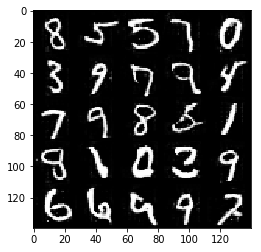

Epoch : 6/10 ... Step : 5410 ... d_loss : 1.0119853019714355 ... g_loss : 1.6935763359069824
Epoch : 6/10 ... Step : 5420 ... d_loss : 1.301363229751587 ... g_loss : 1.5733798742294312
Epoch : 6/10 ... Step : 5430 ... d_loss : 1.2350640296936035 ... g_loss : 1.7045862674713135
Epoch : 6/10 ... Step : 5440 ... d_loss : 1.0687849521636963 ... g_loss : 1.9295611381530762
Epoch : 6/10 ... Step : 5450 ... d_loss : 1.3555736541748047 ... g_loss : 1.0733997821807861
Epoch : 6/10 ... Step : 5460 ... d_loss : 1.145426630973816 ... g_loss : 1.4506018161773682
Epoch : 6/10 ... Step : 5470 ... d_loss : 0.9030230045318604 ... g_loss : 2.032498836517334
Epoch : 6/10 ... Step : 5480 ... d_loss : 1.2574100494384766 ... g_loss : 1.0987799167633057
Epoch : 6/10 ... Step : 5490 ... d_loss : 1.0694559812545776 ... g_loss : 1.854559302330017
Epoch : 6/10 ... Step : 5500 ... d_loss : 1.0420818328857422 ... g_loss : 1.4657341241836548


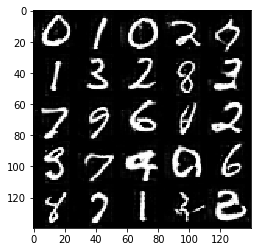

Epoch : 6/10 ... Step : 5510 ... d_loss : 1.111305832862854 ... g_loss : 2.1162362098693848
Epoch : 6/10 ... Step : 5520 ... d_loss : 1.2186880111694336 ... g_loss : 2.1501808166503906
Epoch : 6/10 ... Step : 5530 ... d_loss : 1.0942132472991943 ... g_loss : 1.5259068012237549
Epoch : 6/10 ... Step : 5540 ... d_loss : 1.1692349910736084 ... g_loss : 0.8218421339988708
Epoch : 6/10 ... Step : 5550 ... d_loss : 1.231152892112732 ... g_loss : 1.3247510194778442
Epoch : 6/10 ... Step : 5560 ... d_loss : 1.0089818239212036 ... g_loss : 1.831506371498108
Epoch : 6/10 ... Step : 5570 ... d_loss : 1.055904507637024 ... g_loss : 1.4815473556518555
Epoch : 6/10 ... Step : 5580 ... d_loss : 1.1010156869888306 ... g_loss : 1.969404935836792
Epoch : 6/10 ... Step : 5590 ... d_loss : 1.188836693763733 ... g_loss : 1.7197225093841553
Epoch : 6/10 ... Step : 5600 ... d_loss : 1.4188132286071777 ... g_loss : 1.5676530599594116


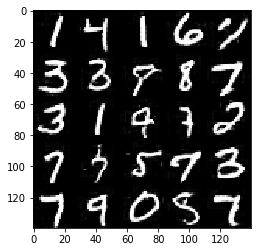

Epoch : 6/10 ... Step : 5610 ... d_loss : 0.7094216346740723 ... g_loss : 1.9914765357971191
Epoch : 6/10 ... Step : 5620 ... d_loss : 1.1832919120788574 ... g_loss : 1.9715224504470825
Epoch : 7/10 ... Step : 5630 ... d_loss : 1.1933674812316895 ... g_loss : 1.01008141040802
Epoch : 7/10 ... Step : 5640 ... d_loss : 1.189583420753479 ... g_loss : 1.3241721391677856
Epoch : 7/10 ... Step : 5650 ... d_loss : 1.0780240297317505 ... g_loss : 1.6218187808990479
Epoch : 7/10 ... Step : 5660 ... d_loss : 1.450674295425415 ... g_loss : 1.1733372211456299
Epoch : 7/10 ... Step : 5670 ... d_loss : 0.9896657466888428 ... g_loss : 1.781690239906311
Epoch : 7/10 ... Step : 5680 ... d_loss : 1.3887068033218384 ... g_loss : 1.2391283512115479
Epoch : 7/10 ... Step : 5690 ... d_loss : 1.3686456680297852 ... g_loss : 1.517233967781067
Epoch : 7/10 ... Step : 5700 ... d_loss : 1.5008805990219116 ... g_loss : 1.0662339925765991


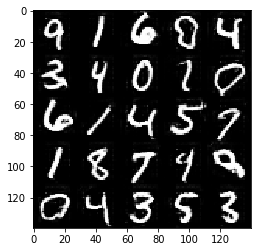

Epoch : 7/10 ... Step : 5710 ... d_loss : 1.1192066669464111 ... g_loss : 1.3907904624938965
Epoch : 7/10 ... Step : 5720 ... d_loss : 1.1893415451049805 ... g_loss : 1.663663625717163
Epoch : 7/10 ... Step : 5730 ... d_loss : 2.0593411922454834 ... g_loss : 0.4649426341056824
Epoch : 7/10 ... Step : 5740 ... d_loss : 1.1506696939468384 ... g_loss : 1.4207546710968018
Epoch : 7/10 ... Step : 5750 ... d_loss : 1.5221800804138184 ... g_loss : 1.4756571054458618
Epoch : 7/10 ... Step : 5760 ... d_loss : 1.2101746797561646 ... g_loss : 0.9883003830909729
Epoch : 7/10 ... Step : 5770 ... d_loss : 1.6850714683532715 ... g_loss : 1.1135953664779663
Epoch : 7/10 ... Step : 5780 ... d_loss : 0.9691221117973328 ... g_loss : 1.4083651304244995
Epoch : 7/10 ... Step : 5790 ... d_loss : 1.0619677305221558 ... g_loss : 1.7415120601654053
Epoch : 7/10 ... Step : 5800 ... d_loss : 1.074800729751587 ... g_loss : 1.2889573574066162


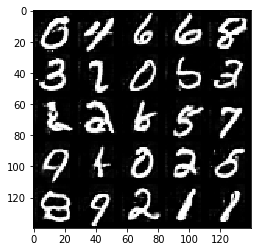

Epoch : 7/10 ... Step : 5810 ... d_loss : 1.4214147329330444 ... g_loss : 1.9233728647232056
Epoch : 7/10 ... Step : 5820 ... d_loss : 1.4412509202957153 ... g_loss : 1.0983355045318604
Epoch : 7/10 ... Step : 5830 ... d_loss : 1.3910273313522339 ... g_loss : 2.275623321533203
Epoch : 7/10 ... Step : 5840 ... d_loss : 1.0517442226409912 ... g_loss : 1.874764084815979
Epoch : 7/10 ... Step : 5850 ... d_loss : 1.0367372035980225 ... g_loss : 1.5043704509735107
Epoch : 7/10 ... Step : 5860 ... d_loss : 1.2190234661102295 ... g_loss : 1.4134016036987305
Epoch : 7/10 ... Step : 5870 ... d_loss : 0.9382629990577698 ... g_loss : 1.6190216541290283
Epoch : 7/10 ... Step : 5880 ... d_loss : 0.8158711791038513 ... g_loss : 1.7264419794082642
Epoch : 7/10 ... Step : 5890 ... d_loss : 1.2383512258529663 ... g_loss : 1.2167854309082031
Epoch : 7/10 ... Step : 5900 ... d_loss : 1.5443310737609863 ... g_loss : 1.4433953762054443


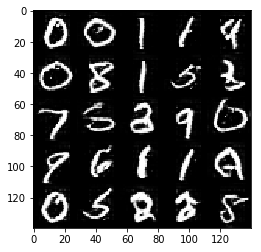

Epoch : 7/10 ... Step : 5910 ... d_loss : 1.1502349376678467 ... g_loss : 2.02815318107605
Epoch : 7/10 ... Step : 5920 ... d_loss : 0.7206244468688965 ... g_loss : 1.770939588546753
Epoch : 7/10 ... Step : 5930 ... d_loss : 1.1176505088806152 ... g_loss : 1.9227991104125977
Epoch : 7/10 ... Step : 5940 ... d_loss : 1.5602096319198608 ... g_loss : 1.1889076232910156
Epoch : 7/10 ... Step : 5950 ... d_loss : 0.9511855840682983 ... g_loss : 1.664135217666626
Epoch : 7/10 ... Step : 5960 ... d_loss : 0.8421211838722229 ... g_loss : 2.3127098083496094
Epoch : 7/10 ... Step : 5970 ... d_loss : 1.9162447452545166 ... g_loss : 0.6359360218048096
Epoch : 7/10 ... Step : 5980 ... d_loss : 0.8113045692443848 ... g_loss : 2.067091464996338
Epoch : 7/10 ... Step : 5990 ... d_loss : 0.9389774203300476 ... g_loss : 1.4377965927124023
Epoch : 7/10 ... Step : 6000 ... d_loss : 1.0798094272613525 ... g_loss : 1.0477278232574463


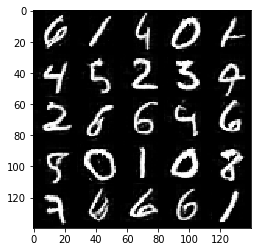

Epoch : 7/10 ... Step : 6010 ... d_loss : 1.1049017906188965 ... g_loss : 1.2410911321640015
Epoch : 7/10 ... Step : 6020 ... d_loss : 0.9769610166549683 ... g_loss : 2.820965528488159
Epoch : 7/10 ... Step : 6030 ... d_loss : 1.2681758403778076 ... g_loss : 1.0524847507476807
Epoch : 7/10 ... Step : 6040 ... d_loss : 1.3368256092071533 ... g_loss : 0.6807454228401184
Epoch : 7/10 ... Step : 6050 ... d_loss : 0.9412081837654114 ... g_loss : 1.6161223649978638
Epoch : 7/10 ... Step : 6060 ... d_loss : 1.119251012802124 ... g_loss : 1.4104645252227783
Epoch : 7/10 ... Step : 6070 ... d_loss : 1.2197957038879395 ... g_loss : 1.6299242973327637
Epoch : 7/10 ... Step : 6080 ... d_loss : 1.8509039878845215 ... g_loss : 0.6311826705932617
Epoch : 7/10 ... Step : 6090 ... d_loss : 1.3057019710540771 ... g_loss : 1.3423899412155151
Epoch : 7/10 ... Step : 6100 ... d_loss : 1.385655164718628 ... g_loss : 0.9966107606887817


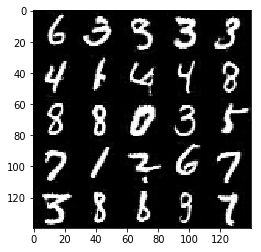

Epoch : 7/10 ... Step : 6110 ... d_loss : 1.0366383790969849 ... g_loss : 1.2686887979507446
Epoch : 7/10 ... Step : 6120 ... d_loss : 1.332214593887329 ... g_loss : 1.7014812231063843
Epoch : 7/10 ... Step : 6130 ... d_loss : 0.7695916891098022 ... g_loss : 1.6521363258361816
Epoch : 7/10 ... Step : 6140 ... d_loss : 1.3145979642868042 ... g_loss : 1.8178099393844604
Epoch : 7/10 ... Step : 6150 ... d_loss : 1.4117511510849 ... g_loss : 1.670358657836914
Epoch : 7/10 ... Step : 6160 ... d_loss : 1.2354950904846191 ... g_loss : 1.5906109809875488
Epoch : 7/10 ... Step : 6170 ... d_loss : 0.8916635513305664 ... g_loss : 1.4752360582351685
Epoch : 7/10 ... Step : 6180 ... d_loss : 1.028468132019043 ... g_loss : 1.2324925661087036
Epoch : 7/10 ... Step : 6190 ... d_loss : 1.0511428117752075 ... g_loss : 1.412222981452942
Epoch : 7/10 ... Step : 6200 ... d_loss : 1.3993221521377563 ... g_loss : 1.1340855360031128


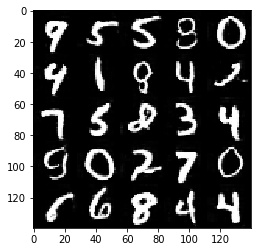

Epoch : 7/10 ... Step : 6210 ... d_loss : 1.1194438934326172 ... g_loss : 1.6929759979248047
Epoch : 7/10 ... Step : 6220 ... d_loss : 1.0042908191680908 ... g_loss : 1.751786708831787
Epoch : 7/10 ... Step : 6230 ... d_loss : 1.192467212677002 ... g_loss : 1.268504023551941
Epoch : 7/10 ... Step : 6240 ... d_loss : 0.9040919542312622 ... g_loss : 1.6039897203445435
Epoch : 7/10 ... Step : 6250 ... d_loss : 1.236149787902832 ... g_loss : 1.5180416107177734
Epoch : 7/10 ... Step : 6260 ... d_loss : 1.1111743450164795 ... g_loss : 1.6446001529693604
Epoch : 7/10 ... Step : 6270 ... d_loss : 1.0624713897705078 ... g_loss : 1.853092908859253
Epoch : 7/10 ... Step : 6280 ... d_loss : 0.9485046863555908 ... g_loss : 1.6839540004730225
Epoch : 7/10 ... Step : 6290 ... d_loss : 1.0901652574539185 ... g_loss : 2.1643707752227783
Epoch : 7/10 ... Step : 6300 ... d_loss : 0.9578503370285034 ... g_loss : 1.2524185180664062


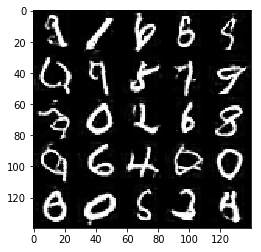

Epoch : 7/10 ... Step : 6310 ... d_loss : 0.9193582534790039 ... g_loss : 2.1267449855804443
Epoch : 7/10 ... Step : 6320 ... d_loss : 1.4441804885864258 ... g_loss : 0.8870463371276855
Epoch : 7/10 ... Step : 6330 ... d_loss : 0.9576966762542725 ... g_loss : 1.712610125541687
Epoch : 7/10 ... Step : 6340 ... d_loss : 1.2024649381637573 ... g_loss : 1.4953291416168213
Epoch : 7/10 ... Step : 6350 ... d_loss : 1.4379584789276123 ... g_loss : 1.2984728813171387
Epoch : 7/10 ... Step : 6360 ... d_loss : 1.1122550964355469 ... g_loss : 1.5574567317962646
Epoch : 7/10 ... Step : 6370 ... d_loss : 1.1595661640167236 ... g_loss : 1.7812983989715576
Epoch : 7/10 ... Step : 6380 ... d_loss : 1.0825724601745605 ... g_loss : 1.2630895376205444
Epoch : 7/10 ... Step : 6390 ... d_loss : 1.7662181854248047 ... g_loss : 0.6775839328765869
Epoch : 7/10 ... Step : 6400 ... d_loss : 1.1585702896118164 ... g_loss : 1.7688833475112915


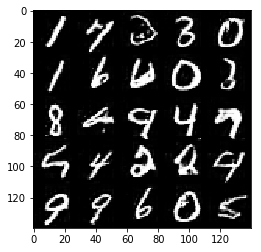

Epoch : 7/10 ... Step : 6410 ... d_loss : 1.3634486198425293 ... g_loss : 1.310145616531372
Epoch : 7/10 ... Step : 6420 ... d_loss : 1.3395099639892578 ... g_loss : 1.7471213340759277
Epoch : 7/10 ... Step : 6430 ... d_loss : 0.7485030293464661 ... g_loss : 2.1558332443237305
Epoch : 7/10 ... Step : 6440 ... d_loss : 1.3393011093139648 ... g_loss : 1.265575647354126
Epoch : 7/10 ... Step : 6450 ... d_loss : 1.1369680166244507 ... g_loss : 1.3182401657104492
Epoch : 7/10 ... Step : 6460 ... d_loss : 1.3624781370162964 ... g_loss : 0.9258568286895752
Epoch : 7/10 ... Step : 6470 ... d_loss : 1.3395649194717407 ... g_loss : 0.7697804570198059
Epoch : 7/10 ... Step : 6480 ... d_loss : 1.4225478172302246 ... g_loss : 1.1656138896942139
Epoch : 7/10 ... Step : 6490 ... d_loss : 1.447884202003479 ... g_loss : 1.7324061393737793
Epoch : 7/10 ... Step : 6500 ... d_loss : 1.1524696350097656 ... g_loss : 2.041227340698242


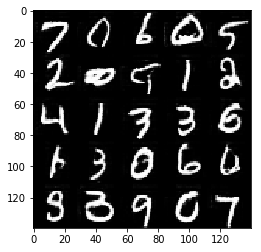

Epoch : 7/10 ... Step : 6510 ... d_loss : 1.0435858964920044 ... g_loss : 1.5690906047821045
Epoch : 7/10 ... Step : 6520 ... d_loss : 0.6012461185455322 ... g_loss : 2.319498300552368
Epoch : 7/10 ... Step : 6530 ... d_loss : 1.348882794380188 ... g_loss : 2.1837074756622314
Epoch : 7/10 ... Step : 6540 ... d_loss : 1.1531596183776855 ... g_loss : 2.2892560958862305
Epoch : 7/10 ... Step : 6550 ... d_loss : 1.7452681064605713 ... g_loss : 0.6267131567001343
Epoch : 8/10 ... Step : 6560 ... d_loss : 1.397379994392395 ... g_loss : 1.0847184658050537
Epoch : 8/10 ... Step : 6570 ... d_loss : 1.2364492416381836 ... g_loss : 1.3476500511169434
Epoch : 8/10 ... Step : 6580 ... d_loss : 1.0838700532913208 ... g_loss : 2.244248151779175
Epoch : 8/10 ... Step : 6590 ... d_loss : 1.14192533493042 ... g_loss : 2.156513214111328
Epoch : 8/10 ... Step : 6600 ... d_loss : 1.4657471179962158 ... g_loss : 1.6035802364349365


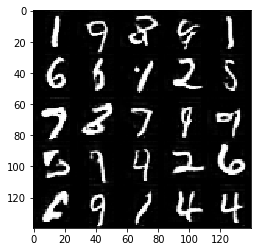

Epoch : 8/10 ... Step : 6610 ... d_loss : 1.0704684257507324 ... g_loss : 1.3354949951171875
Epoch : 8/10 ... Step : 6620 ... d_loss : 1.1420836448669434 ... g_loss : 0.9946694374084473
Epoch : 8/10 ... Step : 6630 ... d_loss : 1.0073411464691162 ... g_loss : 1.268277883529663
Epoch : 8/10 ... Step : 6640 ... d_loss : 1.5012495517730713 ... g_loss : 1.8269973993301392
Epoch : 8/10 ... Step : 6650 ... d_loss : 1.1064907312393188 ... g_loss : 1.234086036682129
Epoch : 8/10 ... Step : 6660 ... d_loss : 1.298266053199768 ... g_loss : 0.9905422329902649
Epoch : 8/10 ... Step : 6670 ... d_loss : 1.131408929824829 ... g_loss : 1.3577470779418945
Epoch : 8/10 ... Step : 6680 ... d_loss : 1.199893593788147 ... g_loss : 2.2928881645202637
Epoch : 8/10 ... Step : 6690 ... d_loss : 1.0406157970428467 ... g_loss : 1.5957529544830322
Epoch : 8/10 ... Step : 6700 ... d_loss : 1.109140396118164 ... g_loss : 1.2804354429244995


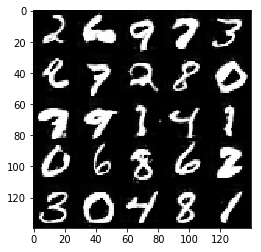

Epoch : 8/10 ... Step : 6710 ... d_loss : 0.7680033445358276 ... g_loss : 1.8643405437469482
Epoch : 8/10 ... Step : 6720 ... d_loss : 1.5354000329971313 ... g_loss : 2.2435948848724365
Epoch : 8/10 ... Step : 6730 ... d_loss : 1.1708725690841675 ... g_loss : 1.7527848482131958
Epoch : 8/10 ... Step : 6740 ... d_loss : 1.3209494352340698 ... g_loss : 2.235614776611328
Epoch : 8/10 ... Step : 6750 ... d_loss : 0.8787155151367188 ... g_loss : 1.5986979007720947
Epoch : 8/10 ... Step : 6760 ... d_loss : 1.254699945449829 ... g_loss : 1.7588932514190674
Epoch : 8/10 ... Step : 6770 ... d_loss : 1.1977614164352417 ... g_loss : 1.873239517211914
Epoch : 8/10 ... Step : 6780 ... d_loss : 0.8877509236335754 ... g_loss : 2.0184013843536377
Epoch : 8/10 ... Step : 6790 ... d_loss : 1.1327521800994873 ... g_loss : 1.6316144466400146
Epoch : 8/10 ... Step : 6800 ... d_loss : 0.8017659783363342 ... g_loss : 1.9013690948486328


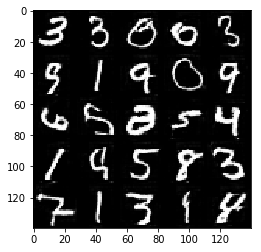

Epoch : 8/10 ... Step : 6810 ... d_loss : 1.7514078617095947 ... g_loss : 1.1350946426391602
Epoch : 8/10 ... Step : 6820 ... d_loss : 0.7596206068992615 ... g_loss : 2.330929756164551
Epoch : 8/10 ... Step : 6830 ... d_loss : 1.1102914810180664 ... g_loss : 1.3234236240386963
Epoch : 8/10 ... Step : 6840 ... d_loss : 1.1861263513565063 ... g_loss : 0.8730262517929077
Epoch : 8/10 ... Step : 6850 ... d_loss : 1.4716522693634033 ... g_loss : 1.9218131303787231
Epoch : 8/10 ... Step : 6860 ... d_loss : 0.9891427159309387 ... g_loss : 1.8266825675964355
Epoch : 8/10 ... Step : 6870 ... d_loss : 0.9435654878616333 ... g_loss : 1.961843729019165
Epoch : 8/10 ... Step : 6880 ... d_loss : 1.1888892650604248 ... g_loss : 1.658873438835144
Epoch : 8/10 ... Step : 6890 ... d_loss : 0.9568202495574951 ... g_loss : 1.723725438117981
Epoch : 8/10 ... Step : 6900 ... d_loss : 1.066551685333252 ... g_loss : 1.0597593784332275


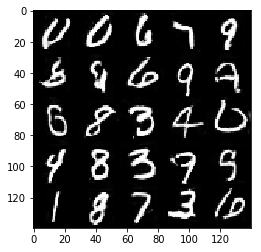

Epoch : 8/10 ... Step : 6910 ... d_loss : 2.532381296157837 ... g_loss : 0.31633150577545166
Epoch : 8/10 ... Step : 6920 ... d_loss : 1.2427431344985962 ... g_loss : 0.9654470086097717
Epoch : 8/10 ... Step : 6930 ... d_loss : 0.9102683663368225 ... g_loss : 1.6661138534545898
Epoch : 8/10 ... Step : 6940 ... d_loss : 1.0290322303771973 ... g_loss : 1.6161820888519287
Epoch : 8/10 ... Step : 6950 ... d_loss : 1.1394699811935425 ... g_loss : 1.773796796798706
Epoch : 8/10 ... Step : 6960 ... d_loss : 1.2812092304229736 ... g_loss : 2.318607807159424
Epoch : 8/10 ... Step : 6970 ... d_loss : 1.256883144378662 ... g_loss : 1.586497187614441
Epoch : 8/10 ... Step : 6980 ... d_loss : 0.9808855056762695 ... g_loss : 1.6323256492614746
Epoch : 8/10 ... Step : 6990 ... d_loss : 1.1570008993148804 ... g_loss : 1.2072632312774658
Epoch : 8/10 ... Step : 7000 ... d_loss : 1.1130962371826172 ... g_loss : 1.5033745765686035


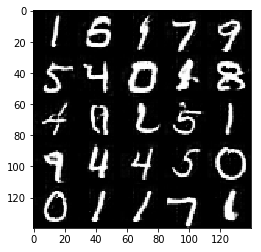

Epoch : 8/10 ... Step : 7010 ... d_loss : 0.8052273988723755 ... g_loss : 1.9701204299926758
Epoch : 8/10 ... Step : 7020 ... d_loss : 1.4596223831176758 ... g_loss : 1.0421912670135498
Epoch : 8/10 ... Step : 7030 ... d_loss : 1.232210397720337 ... g_loss : 1.6735100746154785
Epoch : 8/10 ... Step : 7040 ... d_loss : 1.1685014963150024 ... g_loss : 1.3463513851165771
Epoch : 8/10 ... Step : 7050 ... d_loss : 0.9791011810302734 ... g_loss : 1.550581693649292
Epoch : 8/10 ... Step : 7060 ... d_loss : 1.3491724729537964 ... g_loss : 1.1903443336486816
Epoch : 8/10 ... Step : 7070 ... d_loss : 1.289207100868225 ... g_loss : 1.6700806617736816
Epoch : 8/10 ... Step : 7080 ... d_loss : 1.0484344959259033 ... g_loss : 1.4517829418182373
Epoch : 8/10 ... Step : 7090 ... d_loss : 1.2115236520767212 ... g_loss : 0.7250816226005554
Epoch : 8/10 ... Step : 7100 ... d_loss : 0.9734222888946533 ... g_loss : 1.4706225395202637


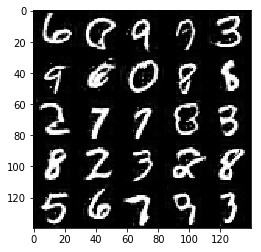

Epoch : 8/10 ... Step : 7110 ... d_loss : 0.7926386594772339 ... g_loss : 1.6032108068466187
Epoch : 8/10 ... Step : 7120 ... d_loss : 1.0685056447982788 ... g_loss : 2.006812572479248
Epoch : 8/10 ... Step : 7130 ... d_loss : 0.8940446376800537 ... g_loss : 1.5352883338928223
Epoch : 8/10 ... Step : 7140 ... d_loss : 1.9477264881134033 ... g_loss : 2.545621871948242
Epoch : 8/10 ... Step : 7150 ... d_loss : 1.1981756687164307 ... g_loss : 1.8763178586959839
Epoch : 8/10 ... Step : 7160 ... d_loss : 1.1039526462554932 ... g_loss : 1.7972769737243652
Epoch : 8/10 ... Step : 7170 ... d_loss : 1.0698683261871338 ... g_loss : 1.5816032886505127
Epoch : 8/10 ... Step : 7180 ... d_loss : 1.2509045600891113 ... g_loss : 1.6152231693267822
Epoch : 8/10 ... Step : 7190 ... d_loss : 1.0355867147445679 ... g_loss : 1.4041483402252197
Epoch : 8/10 ... Step : 7200 ... d_loss : 0.9154732823371887 ... g_loss : 1.7223334312438965


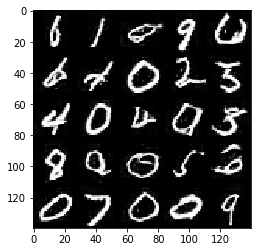

Epoch : 8/10 ... Step : 7210 ... d_loss : 1.1561849117279053 ... g_loss : 1.1314042806625366
Epoch : 8/10 ... Step : 7220 ... d_loss : 1.0100834369659424 ... g_loss : 1.3079935312271118
Epoch : 8/10 ... Step : 7230 ... d_loss : 1.63235604763031 ... g_loss : 2.773237943649292
Epoch : 8/10 ... Step : 7240 ... d_loss : 1.2108780145645142 ... g_loss : 2.0585925579071045
Epoch : 8/10 ... Step : 7250 ... d_loss : 1.0237853527069092 ... g_loss : 1.9482507705688477
Epoch : 8/10 ... Step : 7260 ... d_loss : 0.8367725610733032 ... g_loss : 1.3763800859451294
Epoch : 8/10 ... Step : 7270 ... d_loss : 1.4494162797927856 ... g_loss : 1.2965233325958252
Epoch : 8/10 ... Step : 7280 ... d_loss : 0.8413875699043274 ... g_loss : 1.5777311325073242
Epoch : 8/10 ... Step : 7290 ... d_loss : 0.7864010334014893 ... g_loss : 1.6618287563323975
Epoch : 8/10 ... Step : 7300 ... d_loss : 1.5794719457626343 ... g_loss : 0.6180054545402527


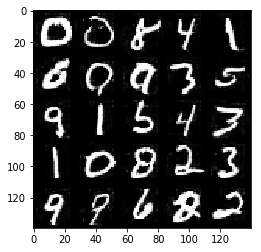

Epoch : 8/10 ... Step : 7310 ... d_loss : 1.2885265350341797 ... g_loss : 0.88750159740448
Epoch : 8/10 ... Step : 7320 ... d_loss : 1.2334612607955933 ... g_loss : 2.1295647621154785
Epoch : 8/10 ... Step : 7330 ... d_loss : 0.8704138994216919 ... g_loss : 1.2410751581192017
Epoch : 8/10 ... Step : 7340 ... d_loss : 1.0487089157104492 ... g_loss : 2.037895679473877
Epoch : 8/10 ... Step : 7350 ... d_loss : 1.0546934604644775 ... g_loss : 1.6136128902435303
Epoch : 8/10 ... Step : 7360 ... d_loss : 1.4420201778411865 ... g_loss : 1.7989988327026367
Epoch : 8/10 ... Step : 7370 ... d_loss : 1.2330764532089233 ... g_loss : 1.2559882402420044
Epoch : 8/10 ... Step : 7380 ... d_loss : 1.4785864353179932 ... g_loss : 1.8055195808410645
Epoch : 8/10 ... Step : 7390 ... d_loss : 1.0342957973480225 ... g_loss : 1.2874791622161865
Epoch : 8/10 ... Step : 7400 ... d_loss : 0.7741355299949646 ... g_loss : 1.9055854082107544


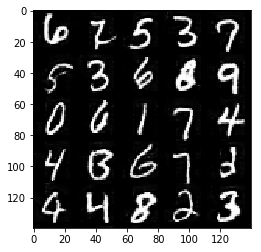

Epoch : 8/10 ... Step : 7410 ... d_loss : 1.53532075881958 ... g_loss : 1.951393961906433
Epoch : 8/10 ... Step : 7420 ... d_loss : 1.279502034187317 ... g_loss : 0.8905709385871887
Epoch : 8/10 ... Step : 7430 ... d_loss : 1.1597554683685303 ... g_loss : 1.2963231801986694
Epoch : 8/10 ... Step : 7440 ... d_loss : 1.2831653356552124 ... g_loss : 1.3832676410675049
Epoch : 8/10 ... Step : 7450 ... d_loss : 1.3669220209121704 ... g_loss : 0.7462263107299805
Epoch : 8/10 ... Step : 7460 ... d_loss : 0.7766393423080444 ... g_loss : 1.2368727922439575
Epoch : 8/10 ... Step : 7470 ... d_loss : 1.164280891418457 ... g_loss : 1.1342601776123047
Epoch : 8/10 ... Step : 7480 ... d_loss : 1.7702429294586182 ... g_loss : 2.0116567611694336
Epoch : 8/10 ... Step : 7490 ... d_loss : 1.3532650470733643 ... g_loss : 1.4125394821166992
Epoch : 9/10 ... Step : 7500 ... d_loss : 1.4260776042938232 ... g_loss : 1.1059491634368896


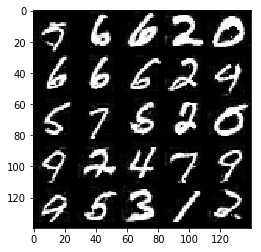

Epoch : 9/10 ... Step : 7510 ... d_loss : 1.0690512657165527 ... g_loss : 1.1345531940460205
Epoch : 9/10 ... Step : 7520 ... d_loss : 1.2421172857284546 ... g_loss : 2.3820924758911133
Epoch : 9/10 ... Step : 7530 ... d_loss : 0.9862536191940308 ... g_loss : 1.8528729677200317
Epoch : 9/10 ... Step : 7540 ... d_loss : 1.0564156770706177 ... g_loss : 1.1646313667297363
Epoch : 9/10 ... Step : 7550 ... d_loss : 0.9549446105957031 ... g_loss : 1.231723666191101
Epoch : 9/10 ... Step : 7560 ... d_loss : 0.9831408262252808 ... g_loss : 1.7197093963623047
Epoch : 9/10 ... Step : 7570 ... d_loss : 0.8617582321166992 ... g_loss : 1.9350872039794922
Epoch : 9/10 ... Step : 7580 ... d_loss : 1.0724328756332397 ... g_loss : 0.9509475231170654
Epoch : 9/10 ... Step : 7590 ... d_loss : 1.3136065006256104 ... g_loss : 0.5885337591171265
Epoch : 9/10 ... Step : 7600 ... d_loss : 0.8344604969024658 ... g_loss : 1.232890248298645


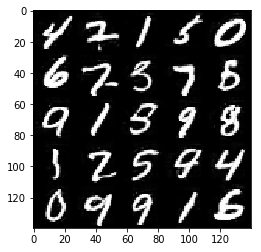

Epoch : 9/10 ... Step : 7610 ... d_loss : 1.282480001449585 ... g_loss : 0.9084396958351135
Epoch : 9/10 ... Step : 7620 ... d_loss : 1.359025478363037 ... g_loss : 1.675611138343811
Epoch : 9/10 ... Step : 7630 ... d_loss : 1.5640159845352173 ... g_loss : 2.214276075363159
Epoch : 9/10 ... Step : 7640 ... d_loss : 0.8527853488922119 ... g_loss : 1.6301020383834839
Epoch : 9/10 ... Step : 7650 ... d_loss : 1.4213441610336304 ... g_loss : 1.7398799657821655
Epoch : 9/10 ... Step : 7660 ... d_loss : 1.0130480527877808 ... g_loss : 1.5947434902191162
Epoch : 9/10 ... Step : 7670 ... d_loss : 1.029176950454712 ... g_loss : 1.8203659057617188
Epoch : 9/10 ... Step : 7680 ... d_loss : 1.2444453239440918 ... g_loss : 1.8615803718566895
Epoch : 9/10 ... Step : 7690 ... d_loss : 0.9413425922393799 ... g_loss : 1.9399622678756714
Epoch : 9/10 ... Step : 7700 ... d_loss : 1.2370176315307617 ... g_loss : 2.234171152114868


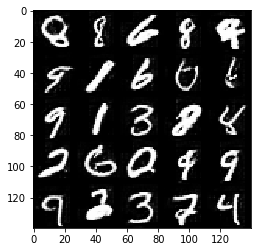

Epoch : 9/10 ... Step : 7710 ... d_loss : 1.6447691917419434 ... g_loss : 1.1363246440887451
Epoch : 9/10 ... Step : 7720 ... d_loss : 1.5488744974136353 ... g_loss : 0.8113495707511902
Epoch : 9/10 ... Step : 7730 ... d_loss : 1.1696680784225464 ... g_loss : 1.5566266775131226
Epoch : 9/10 ... Step : 7740 ... d_loss : 0.9786255359649658 ... g_loss : 1.775349736213684
Epoch : 9/10 ... Step : 7750 ... d_loss : 1.6946747303009033 ... g_loss : 0.8300864100456238
Epoch : 9/10 ... Step : 7760 ... d_loss : 1.4302939176559448 ... g_loss : 2.254789352416992
Epoch : 9/10 ... Step : 7770 ... d_loss : 0.9720194339752197 ... g_loss : 2.134117364883423
Epoch : 9/10 ... Step : 7780 ... d_loss : 0.8893060684204102 ... g_loss : 1.4818685054779053
Epoch : 9/10 ... Step : 7790 ... d_loss : 1.13861882686615 ... g_loss : 1.3796319961547852
Epoch : 9/10 ... Step : 7800 ... d_loss : 1.245585322380066 ... g_loss : 0.8203712105751038


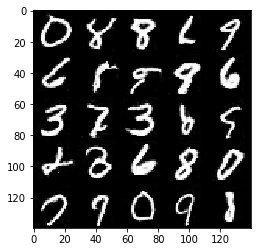

Epoch : 9/10 ... Step : 7810 ... d_loss : 0.5106305480003357 ... g_loss : 1.9793815612792969
Epoch : 9/10 ... Step : 7820 ... d_loss : 1.2571858167648315 ... g_loss : 1.8741586208343506
Epoch : 9/10 ... Step : 7830 ... d_loss : 1.4322075843811035 ... g_loss : 2.13315749168396
Epoch : 9/10 ... Step : 7840 ... d_loss : 0.886711061000824 ... g_loss : 1.3107106685638428
Epoch : 9/10 ... Step : 7850 ... d_loss : 0.8660480976104736 ... g_loss : 1.86759614944458
Epoch : 9/10 ... Step : 7860 ... d_loss : 1.0862449407577515 ... g_loss : 1.5576865673065186
Epoch : 9/10 ... Step : 7870 ... d_loss : 1.0510333776474 ... g_loss : 1.654975414276123
Epoch : 9/10 ... Step : 7880 ... d_loss : 0.959342360496521 ... g_loss : 1.5960803031921387
Epoch : 9/10 ... Step : 7890 ... d_loss : 1.2122719287872314 ... g_loss : 1.6137139797210693
Epoch : 9/10 ... Step : 7900 ... d_loss : 0.8814342021942139 ... g_loss : 1.8929623365402222


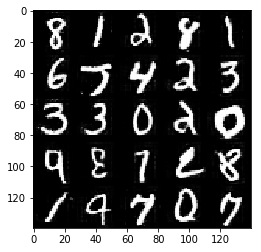

Epoch : 9/10 ... Step : 7910 ... d_loss : 1.3628123998641968 ... g_loss : 1.2138794660568237
Epoch : 9/10 ... Step : 7920 ... d_loss : 1.3702095746994019 ... g_loss : 1.6255724430084229
Epoch : 9/10 ... Step : 7930 ... d_loss : 1.3248200416564941 ... g_loss : 1.213507890701294
Epoch : 9/10 ... Step : 7940 ... d_loss : 1.172656536102295 ... g_loss : 1.0493831634521484
Epoch : 9/10 ... Step : 7950 ... d_loss : 0.9653024077415466 ... g_loss : 1.5304521322250366
Epoch : 9/10 ... Step : 7960 ... d_loss : 0.7714351415634155 ... g_loss : 1.5819010734558105
Epoch : 9/10 ... Step : 7970 ... d_loss : 0.887825608253479 ... g_loss : 2.0956931114196777
Epoch : 9/10 ... Step : 7980 ... d_loss : 0.6861331462860107 ... g_loss : 2.2316184043884277
Epoch : 9/10 ... Step : 7990 ... d_loss : 0.8770765662193298 ... g_loss : 1.9182519912719727
Epoch : 9/10 ... Step : 8000 ... d_loss : 0.8556073904037476 ... g_loss : 1.748039960861206


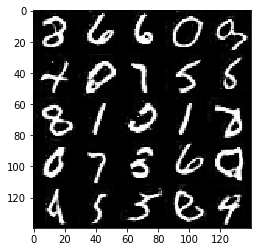

Epoch : 9/10 ... Step : 8010 ... d_loss : 1.310373067855835 ... g_loss : 1.102137804031372
Epoch : 9/10 ... Step : 8020 ... d_loss : 1.6457462310791016 ... g_loss : 0.6630373597145081
Epoch : 9/10 ... Step : 8030 ... d_loss : 1.0207796096801758 ... g_loss : 1.6926652193069458
Epoch : 9/10 ... Step : 8040 ... d_loss : 1.0688550472259521 ... g_loss : 1.9330205917358398
Epoch : 9/10 ... Step : 8050 ... d_loss : 0.904305100440979 ... g_loss : 2.1550192832946777
Epoch : 9/10 ... Step : 8060 ... d_loss : 0.7593580484390259 ... g_loss : 2.2203497886657715
Epoch : 9/10 ... Step : 8070 ... d_loss : 1.061448574066162 ... g_loss : 1.0054185390472412
Epoch : 9/10 ... Step : 8080 ... d_loss : 1.4716341495513916 ... g_loss : 1.7260996103286743
Epoch : 9/10 ... Step : 8090 ... d_loss : 1.2164816856384277 ... g_loss : 1.447737216949463
Epoch : 9/10 ... Step : 8100 ... d_loss : 1.517053484916687 ... g_loss : 1.9291152954101562


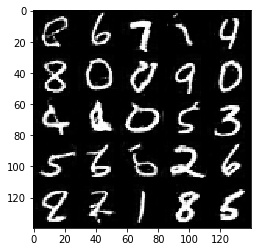

Epoch : 9/10 ... Step : 8110 ... d_loss : 1.1231236457824707 ... g_loss : 1.2958201169967651
Epoch : 9/10 ... Step : 8120 ... d_loss : 0.8298530578613281 ... g_loss : 1.6286531686782837
Epoch : 9/10 ... Step : 8130 ... d_loss : 0.7486998438835144 ... g_loss : 2.2159433364868164
Epoch : 9/10 ... Step : 8140 ... d_loss : 1.186905026435852 ... g_loss : 1.7398872375488281
Epoch : 9/10 ... Step : 8150 ... d_loss : 1.0107645988464355 ... g_loss : 1.8132888078689575
Epoch : 9/10 ... Step : 8160 ... d_loss : 0.813130259513855 ... g_loss : 1.6814433336257935
Epoch : 9/10 ... Step : 8170 ... d_loss : 1.0537996292114258 ... g_loss : 2.3306379318237305
Epoch : 9/10 ... Step : 8180 ... d_loss : 1.8345813751220703 ... g_loss : 0.8432610034942627
Epoch : 9/10 ... Step : 8190 ... d_loss : 0.8709725737571716 ... g_loss : 2.327428102493286
Epoch : 9/10 ... Step : 8200 ... d_loss : 0.9355443120002747 ... g_loss : 1.6084171533584595


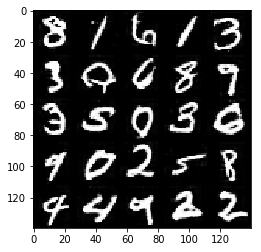

Epoch : 9/10 ... Step : 8210 ... d_loss : 0.7470718622207642 ... g_loss : 1.5026962757110596
Epoch : 9/10 ... Step : 8220 ... d_loss : 0.7649043798446655 ... g_loss : 2.32625675201416
Epoch : 9/10 ... Step : 8230 ... d_loss : 1.1832753419876099 ... g_loss : 0.8809221982955933
Epoch : 9/10 ... Step : 8240 ... d_loss : 1.3768950700759888 ... g_loss : 1.1167957782745361
Epoch : 9/10 ... Step : 8250 ... d_loss : 1.3883044719696045 ... g_loss : 0.8823664784431458
Epoch : 9/10 ... Step : 8260 ... d_loss : 0.9641090631484985 ... g_loss : 1.4840686321258545
Epoch : 9/10 ... Step : 8270 ... d_loss : 0.7500073313713074 ... g_loss : 2.1961164474487305
Epoch : 9/10 ... Step : 8280 ... d_loss : 0.8947101831436157 ... g_loss : 1.4839342832565308
Epoch : 9/10 ... Step : 8290 ... d_loss : 1.039616584777832 ... g_loss : 1.6708283424377441
Epoch : 9/10 ... Step : 8300 ... d_loss : 1.100677728652954 ... g_loss : 1.5805644989013672


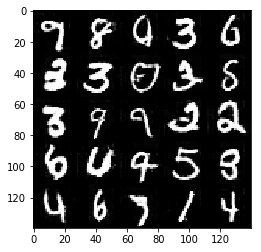

Epoch : 9/10 ... Step : 8310 ... d_loss : 1.1201722621917725 ... g_loss : 1.5053138732910156
Epoch : 9/10 ... Step : 8320 ... d_loss : 1.1721935272216797 ... g_loss : 1.5621670484542847
Epoch : 9/10 ... Step : 8330 ... d_loss : 0.8747469186782837 ... g_loss : 1.8753612041473389
Epoch : 9/10 ... Step : 8340 ... d_loss : 1.4015114307403564 ... g_loss : 2.0085959434509277
Epoch : 9/10 ... Step : 8350 ... d_loss : 0.853701114654541 ... g_loss : 1.4752416610717773
Epoch : 9/10 ... Step : 8360 ... d_loss : 1.0527592897415161 ... g_loss : 1.5660258531570435
Epoch : 9/10 ... Step : 8370 ... d_loss : 1.035327434539795 ... g_loss : 1.794405221939087
Epoch : 9/10 ... Step : 8380 ... d_loss : 1.0983020067214966 ... g_loss : 1.9753093719482422
Epoch : 9/10 ... Step : 8390 ... d_loss : 1.055265188217163 ... g_loss : 1.7048554420471191
Epoch : 9/10 ... Step : 8400 ... d_loss : 1.9957921504974365 ... g_loss : 0.7056284546852112


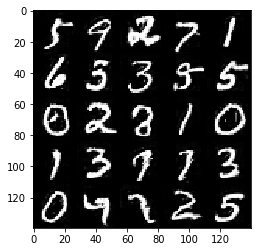

Epoch : 9/10 ... Step : 8410 ... d_loss : 1.0760681629180908 ... g_loss : 1.6521084308624268
Epoch : 9/10 ... Step : 8420 ... d_loss : 0.9466656446456909 ... g_loss : 1.6927525997161865
Epoch : 9/10 ... Step : 8430 ... d_loss : 0.9408044815063477 ... g_loss : 1.7616448402404785
Epoch : 10/10 ... Step : 8440 ... d_loss : 0.815579891204834 ... g_loss : 1.6554946899414062
Epoch : 10/10 ... Step : 8450 ... d_loss : 1.3513761758804321 ... g_loss : 0.910862922668457
Epoch : 10/10 ... Step : 8460 ... d_loss : 0.7694778442382812 ... g_loss : 1.4996206760406494
Epoch : 10/10 ... Step : 8470 ... d_loss : 1.165954828262329 ... g_loss : 1.0619714260101318
Epoch : 10/10 ... Step : 8480 ... d_loss : 0.9386001229286194 ... g_loss : 1.7181942462921143
Epoch : 10/10 ... Step : 8490 ... d_loss : 1.002408742904663 ... g_loss : 1.3787336349487305
Epoch : 10/10 ... Step : 8500 ... d_loss : 0.9855074882507324 ... g_loss : 1.6499745845794678


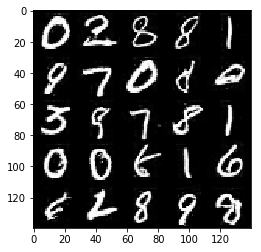

Epoch : 10/10 ... Step : 8510 ... d_loss : 0.6300524473190308 ... g_loss : 1.8536860942840576
Epoch : 10/10 ... Step : 8520 ... d_loss : 0.7445724606513977 ... g_loss : 2.330075979232788
Epoch : 10/10 ... Step : 8530 ... d_loss : 1.5982192754745483 ... g_loss : 0.6769673824310303
Epoch : 10/10 ... Step : 8540 ... d_loss : 0.877793550491333 ... g_loss : 1.2796757221221924
Epoch : 10/10 ... Step : 8550 ... d_loss : 1.136272668838501 ... g_loss : 1.011857271194458
Epoch : 10/10 ... Step : 8560 ... d_loss : 1.197906255722046 ... g_loss : 2.302493095397949
Epoch : 10/10 ... Step : 8570 ... d_loss : 1.4475862979888916 ... g_loss : 2.2577552795410156
Epoch : 10/10 ... Step : 8580 ... d_loss : 1.0413206815719604 ... g_loss : 1.7038944959640503
Epoch : 10/10 ... Step : 8590 ... d_loss : 1.2582321166992188 ... g_loss : 1.9100549221038818
Epoch : 10/10 ... Step : 8600 ... d_loss : 1.1549010276794434 ... g_loss : 1.2647358179092407


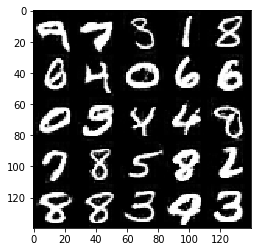

Epoch : 10/10 ... Step : 8610 ... d_loss : 1.0850155353546143 ... g_loss : 1.8625520467758179
Epoch : 10/10 ... Step : 8620 ... d_loss : 1.393239140510559 ... g_loss : 0.9867937564849854
Epoch : 10/10 ... Step : 8630 ... d_loss : 0.7598713040351868 ... g_loss : 2.715024471282959
Epoch : 10/10 ... Step : 8640 ... d_loss : 0.7798483371734619 ... g_loss : 2.6381421089172363
Epoch : 10/10 ... Step : 8650 ... d_loss : 0.9899658560752869 ... g_loss : 1.2043265104293823
Epoch : 10/10 ... Step : 8660 ... d_loss : 1.4580564498901367 ... g_loss : 1.0374481678009033
Epoch : 10/10 ... Step : 8670 ... d_loss : 1.669385552406311 ... g_loss : 2.358844757080078
Epoch : 10/10 ... Step : 8680 ... d_loss : 0.8196337223052979 ... g_loss : 1.8394949436187744
Epoch : 10/10 ... Step : 8690 ... d_loss : 0.7553269863128662 ... g_loss : 1.7509931325912476
Epoch : 10/10 ... Step : 8700 ... d_loss : 1.346917986869812 ... g_loss : 2.3188226222991943


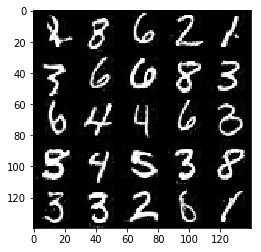

Epoch : 10/10 ... Step : 8710 ... d_loss : 1.1517332792282104 ... g_loss : 1.1614031791687012
Epoch : 10/10 ... Step : 8720 ... d_loss : 1.2427656650543213 ... g_loss : 1.080883264541626
Epoch : 10/10 ... Step : 8730 ... d_loss : 1.0662190914154053 ... g_loss : 1.3076016902923584
Epoch : 10/10 ... Step : 8740 ... d_loss : 1.0373082160949707 ... g_loss : 1.2123011350631714
Epoch : 10/10 ... Step : 8750 ... d_loss : 1.2996634244918823 ... g_loss : 1.7755162715911865
Epoch : 10/10 ... Step : 8760 ... d_loss : 0.9815490245819092 ... g_loss : 1.479689359664917
Epoch : 10/10 ... Step : 8770 ... d_loss : 1.2483034133911133 ... g_loss : 1.5594713687896729
Epoch : 10/10 ... Step : 8780 ... d_loss : 0.6483445763587952 ... g_loss : 2.1900014877319336
Epoch : 10/10 ... Step : 8790 ... d_loss : 1.1668001413345337 ... g_loss : 1.2398892641067505
Epoch : 10/10 ... Step : 8800 ... d_loss : 0.8241018652915955 ... g_loss : 1.2737562656402588


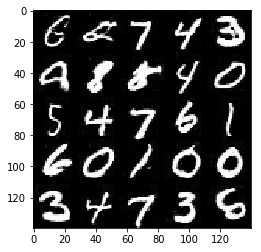

Epoch : 10/10 ... Step : 8810 ... d_loss : 0.9183206558227539 ... g_loss : 2.3337740898132324
Epoch : 10/10 ... Step : 8820 ... d_loss : 1.002612829208374 ... g_loss : 2.0162220001220703
Epoch : 10/10 ... Step : 8830 ... d_loss : 0.8280103206634521 ... g_loss : 1.4660965204238892
Epoch : 10/10 ... Step : 8840 ... d_loss : 0.931216835975647 ... g_loss : 1.4276762008666992
Epoch : 10/10 ... Step : 8850 ... d_loss : 1.4261527061462402 ... g_loss : 1.1123676300048828
Epoch : 10/10 ... Step : 8860 ... d_loss : 0.9099525213241577 ... g_loss : 2.2442879676818848
Epoch : 10/10 ... Step : 8870 ... d_loss : 1.540173888206482 ... g_loss : 0.7218708992004395
Epoch : 10/10 ... Step : 8880 ... d_loss : 1.0238333940505981 ... g_loss : 2.659327507019043
Epoch : 10/10 ... Step : 8890 ... d_loss : 0.7025363445281982 ... g_loss : 2.2418107986450195
Epoch : 10/10 ... Step : 8900 ... d_loss : 0.8515998721122742 ... g_loss : 1.892830491065979


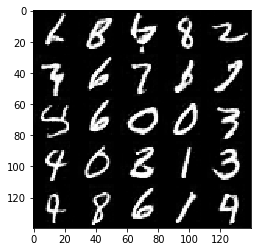

Epoch : 10/10 ... Step : 8910 ... d_loss : 0.9826773405075073 ... g_loss : 1.5758957862854004
Epoch : 10/10 ... Step : 8920 ... d_loss : 0.8249837160110474 ... g_loss : 2.756190061569214
Epoch : 10/10 ... Step : 8930 ... d_loss : 0.8422342538833618 ... g_loss : 1.8385099172592163
Epoch : 10/10 ... Step : 8940 ... d_loss : 0.7032376527786255 ... g_loss : 2.3823695182800293
Epoch : 10/10 ... Step : 8950 ... d_loss : 1.0331752300262451 ... g_loss : 1.5624152421951294
Epoch : 10/10 ... Step : 8960 ... d_loss : 0.8216298222541809 ... g_loss : 1.50259268283844
Epoch : 10/10 ... Step : 8970 ... d_loss : 0.8708969950675964 ... g_loss : 1.5250803232192993
Epoch : 10/10 ... Step : 8980 ... d_loss : 0.8076189756393433 ... g_loss : 2.2619173526763916
Epoch : 10/10 ... Step : 8990 ... d_loss : 0.9370424747467041 ... g_loss : 2.0225870609283447
Epoch : 10/10 ... Step : 9000 ... d_loss : 0.5174486637115479 ... g_loss : 2.897341728210449


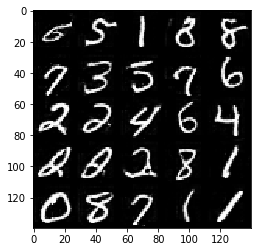

Epoch : 10/10 ... Step : 9010 ... d_loss : 1.1641203165054321 ... g_loss : 0.590766429901123
Epoch : 10/10 ... Step : 9020 ... d_loss : 0.7329505085945129 ... g_loss : 1.84535813331604
Epoch : 10/10 ... Step : 9030 ... d_loss : 0.9710518717765808 ... g_loss : 1.8709715604782104
Epoch : 10/10 ... Step : 9040 ... d_loss : 1.2832276821136475 ... g_loss : 1.4811843633651733
Epoch : 10/10 ... Step : 9050 ... d_loss : 1.573182225227356 ... g_loss : 2.669631242752075
Epoch : 10/10 ... Step : 9060 ... d_loss : 1.0485975742340088 ... g_loss : 2.3890280723571777
Epoch : 10/10 ... Step : 9070 ... d_loss : 1.2196539640426636 ... g_loss : 2.168206214904785
Epoch : 10/10 ... Step : 9080 ... d_loss : 0.9358562231063843 ... g_loss : 1.9124269485473633
Epoch : 10/10 ... Step : 9090 ... d_loss : 1.2890615463256836 ... g_loss : 1.6146193742752075
Epoch : 10/10 ... Step : 9100 ... d_loss : 0.936633825302124 ... g_loss : 1.9937028884887695


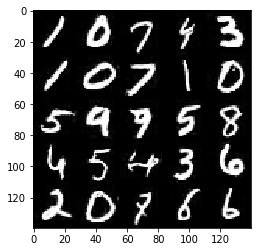

Epoch : 10/10 ... Step : 9110 ... d_loss : 0.6147664785385132 ... g_loss : 2.58244252204895
Epoch : 10/10 ... Step : 9120 ... d_loss : 1.0188722610473633 ... g_loss : 1.2864291667938232
Epoch : 10/10 ... Step : 9130 ... d_loss : 1.0395474433898926 ... g_loss : 2.5212607383728027
Epoch : 10/10 ... Step : 9140 ... d_loss : 0.5934107899665833 ... g_loss : 2.686736583709717
Epoch : 10/10 ... Step : 9150 ... d_loss : 1.9939579963684082 ... g_loss : 2.514406681060791
Epoch : 10/10 ... Step : 9160 ... d_loss : 1.4173007011413574 ... g_loss : 1.2090107202529907
Epoch : 10/10 ... Step : 9170 ... d_loss : 1.0778614282608032 ... g_loss : 1.7989526987075806
Epoch : 10/10 ... Step : 9180 ... d_loss : 1.0946177244186401 ... g_loss : 1.4175786972045898
Epoch : 10/10 ... Step : 9190 ... d_loss : 0.9971203207969666 ... g_loss : 1.9218937158584595
Epoch : 10/10 ... Step : 9200 ... d_loss : 1.0010831356048584 ... g_loss : 2.0352835655212402


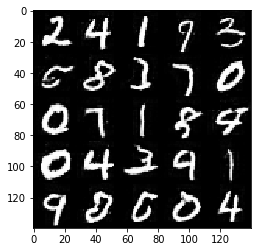

Epoch : 10/10 ... Step : 9210 ... d_loss : 0.6991555690765381 ... g_loss : 1.749584436416626
Epoch : 10/10 ... Step : 9220 ... d_loss : 1.4113552570343018 ... g_loss : 0.6366611123085022
Epoch : 10/10 ... Step : 9230 ... d_loss : 1.5243779420852661 ... g_loss : 0.6604592204093933
Epoch : 10/10 ... Step : 9240 ... d_loss : 1.5142743587493896 ... g_loss : 2.041266441345215
Epoch : 10/10 ... Step : 9250 ... d_loss : 1.0626171827316284 ... g_loss : 0.8294925093650818
Epoch : 10/10 ... Step : 9260 ... d_loss : 1.0595941543579102 ... g_loss : 1.3815809488296509
Epoch : 10/10 ... Step : 9270 ... d_loss : 1.2329984903335571 ... g_loss : 1.9201257228851318
Epoch : 10/10 ... Step : 9280 ... d_loss : 1.1495349407196045 ... g_loss : 2.007633686065674
Epoch : 10/10 ... Step : 9290 ... d_loss : 0.9524642825126648 ... g_loss : 1.475036859512329
Epoch : 10/10 ... Step : 9300 ... d_loss : 1.3838697671890259 ... g_loss : 0.8934788703918457


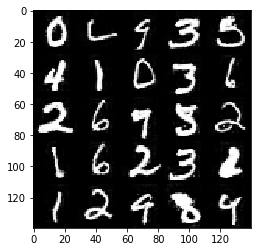

Epoch : 10/10 ... Step : 9310 ... d_loss : 1.0750164985656738 ... g_loss : 1.741858959197998
Epoch : 10/10 ... Step : 9320 ... d_loss : 0.7574335336685181 ... g_loss : 1.9223805665969849
Epoch : 10/10 ... Step : 9330 ... d_loss : 0.8249992728233337 ... g_loss : 1.8073979616165161
Epoch : 10/10 ... Step : 9340 ... d_loss : 1.1841422319412231 ... g_loss : 1.5819623470306396
Epoch : 10/10 ... Step : 9350 ... d_loss : 0.925299882888794 ... g_loss : 2.023791790008545
Epoch : 10/10 ... Step : 9360 ... d_loss : 0.5967101454734802 ... g_loss : 2.2782793045043945
Epoch : 10/10 ... Step : 9370 ... d_loss : 0.31770002841949463 ... g_loss : 3.394221305847168


In [26]:
batch_size = 64
z_dim = 100
learning_rate = 1e-3
beta1 = .5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 10

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch : 1/10 ... Step : 100 ... d_loss : 1.0287472009658813 ... g_loss : 4.913509845733643
Epoch : 1/10 ... Step : 200 ... d_loss : 0.1971321702003479 ... g_loss : 4.814165115356445
Epoch : 1/10 ... Step : 300 ... d_loss : 0.5047277808189392 ... g_loss : 7.546243190765381
Epoch : 1/10 ... Step : 400 ... d_loss : 0.8603226542472839 ... g_loss : 2.971930503845215
Epoch : 1/10 ... Step : 500 ... d_loss : 0.9408867359161377 ... g_loss : 2.8581595420837402
Epoch : 1/10 ... Step : 600 ... d_loss : 1.1096773147583008 ... g_loss : 5.273266792297363
Epoch : 1/10 ... Step : 700 ... d_loss : 1.3380367755889893 ... g_loss : 9.13988971710205
Epoch : 1/10 ... Step : 800 ... d_loss : 1.3008843660354614 ... g_loss : 7.096059799194336
Epoch : 1/10 ... Step : 900 ... d_loss : 0.8039860725402832 ... g_loss : 4.135557174682617
Epoch : 1/10 ... Step : 1000 ... d_loss : 0.4306844472885132 ... g_loss : 3.84256649017334


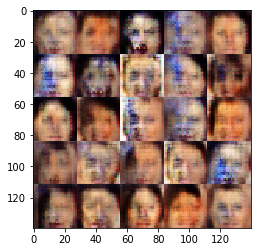

Epoch : 1/10 ... Step : 1100 ... d_loss : 1.0759766101837158 ... g_loss : 2.717575788497925
Epoch : 1/10 ... Step : 1200 ... d_loss : 0.5745567083358765 ... g_loss : 3.1733531951904297
Epoch : 1/10 ... Step : 1300 ... d_loss : 0.874500036239624 ... g_loss : 5.483311653137207
Epoch : 1/10 ... Step : 1400 ... d_loss : 0.8170494437217712 ... g_loss : 4.031900405883789
Epoch : 1/10 ... Step : 1500 ... d_loss : 0.7012152671813965 ... g_loss : 2.842150926589966
Epoch : 1/10 ... Step : 1600 ... d_loss : 1.2192628383636475 ... g_loss : 1.5691099166870117
Epoch : 1/10 ... Step : 1700 ... d_loss : 0.9400996565818787 ... g_loss : 1.761407732963562
Epoch : 1/10 ... Step : 1800 ... d_loss : 0.6365081071853638 ... g_loss : 3.39491868019104
Epoch : 1/10 ... Step : 1900 ... d_loss : 1.0600723028182983 ... g_loss : 3.4706149101257324
Epoch : 1/10 ... Step : 2000 ... d_loss : 1.2156620025634766 ... g_loss : 0.9089024066925049


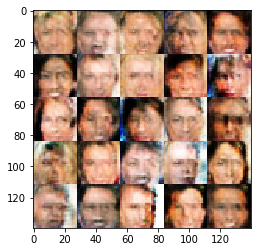

Epoch : 1/10 ... Step : 2100 ... d_loss : 1.2174301147460938 ... g_loss : 1.5094236135482788
Epoch : 1/10 ... Step : 2200 ... d_loss : 0.6670942306518555 ... g_loss : 3.2092130184173584
Epoch : 1/10 ... Step : 2300 ... d_loss : 2.1695430278778076 ... g_loss : 4.929603576660156
Epoch : 1/10 ... Step : 3100 ... d_loss : 0.7997537851333618 ... g_loss : 2.1559019088745117
Epoch : 2/10 ... Step : 3200 ... d_loss : 0.8079975843429565 ... g_loss : 3.2129456996917725
Epoch : 2/10 ... Step : 3300 ... d_loss : 1.440914273262024 ... g_loss : 4.162886142730713
Epoch : 2/10 ... Step : 3400 ... d_loss : 0.8459769487380981 ... g_loss : 2.7503976821899414
Epoch : 2/10 ... Step : 3500 ... d_loss : 0.8193541169166565 ... g_loss : 3.230858087539673
Epoch : 2/10 ... Step : 3600 ... d_loss : 0.45888757705688477 ... g_loss : 2.8935532569885254
Epoch : 2/10 ... Step : 3700 ... d_loss : 0.693852424621582 ... g_loss : 2.902057647705078
Epoch : 2/10 ... Step : 3800 ... d_loss : 0.6226576566696167 ... g_loss : 2

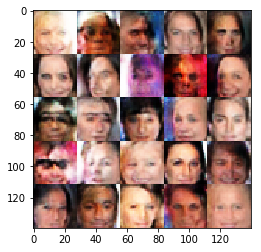

Epoch : 2/10 ... Step : 4100 ... d_loss : 0.8379402160644531 ... g_loss : 2.385582447052002
Epoch : 2/10 ... Step : 4200 ... d_loss : 0.8908064365386963 ... g_loss : 1.6625399589538574
Epoch : 2/10 ... Step : 4300 ... d_loss : 1.0433250665664673 ... g_loss : 2.902287483215332
Epoch : 2/10 ... Step : 4400 ... d_loss : 1.0211681127548218 ... g_loss : 2.5208113193511963
Epoch : 2/10 ... Step : 4500 ... d_loss : 1.0271576642990112 ... g_loss : 1.5359323024749756
Epoch : 2/10 ... Step : 4600 ... d_loss : 1.0324032306671143 ... g_loss : 2.5694899559020996
Epoch : 2/10 ... Step : 4700 ... d_loss : 1.3499151468276978 ... g_loss : 1.4110504388809204
Epoch : 2/10 ... Step : 4800 ... d_loss : 1.5500291585922241 ... g_loss : 1.5966724157333374
Epoch : 2/10 ... Step : 4900 ... d_loss : 0.8188830614089966 ... g_loss : 2.719914197921753
Epoch : 2/10 ... Step : 5000 ... d_loss : 1.3808276653289795 ... g_loss : 3.2159249782562256


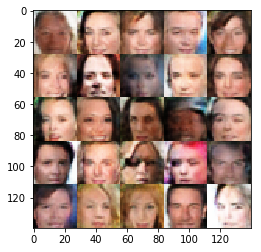

Epoch : 2/10 ... Step : 5100 ... d_loss : 1.105290412902832 ... g_loss : 2.910834789276123
Epoch : 2/10 ... Step : 5200 ... d_loss : 1.0301580429077148 ... g_loss : 1.734355092048645
Epoch : 2/10 ... Step : 5300 ... d_loss : 1.2616543769836426 ... g_loss : 3.0425686836242676
Epoch : 2/10 ... Step : 5400 ... d_loss : 0.8479446172714233 ... g_loss : 2.239266872406006
Epoch : 2/10 ... Step : 5500 ... d_loss : 1.2329925298690796 ... g_loss : 2.6007165908813477
Epoch : 2/10 ... Step : 5600 ... d_loss : 1.185122013092041 ... g_loss : 3.152071475982666
Epoch : 2/10 ... Step : 5700 ... d_loss : 0.7369276285171509 ... g_loss : 2.2165677547454834
Epoch : 2/10 ... Step : 5800 ... d_loss : 1.446530818939209 ... g_loss : 0.9682015776634216
Epoch : 2/10 ... Step : 5900 ... d_loss : 0.7399184703826904 ... g_loss : 1.8325589895248413
Epoch : 2/10 ... Step : 6000 ... d_loss : 0.6212009191513062 ... g_loss : 2.208449125289917


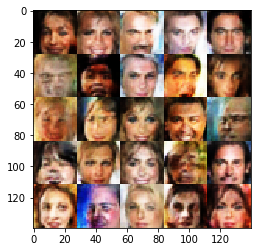

Epoch : 2/10 ... Step : 6100 ... d_loss : 0.9751419425010681 ... g_loss : 2.203728199005127
Epoch : 2/10 ... Step : 6200 ... d_loss : 0.9715573191642761 ... g_loss : 3.6269946098327637
Epoch : 2/10 ... Step : 6300 ... d_loss : 0.9319593906402588 ... g_loss : 1.2512898445129395
Epoch : 3/10 ... Step : 6400 ... d_loss : 0.5042029619216919 ... g_loss : 3.33091402053833
Epoch : 3/10 ... Step : 6500 ... d_loss : 0.9896840453147888 ... g_loss : 1.7849141359329224
Epoch : 3/10 ... Step : 6600 ... d_loss : 0.6108793020248413 ... g_loss : 2.656820774078369
Epoch : 3/10 ... Step : 6700 ... d_loss : 1.3782483339309692 ... g_loss : 4.0687713623046875
Epoch : 3/10 ... Step : 6800 ... d_loss : 0.549913763999939 ... g_loss : 3.181194543838501
Epoch : 3/10 ... Step : 6900 ... d_loss : 0.8898290991783142 ... g_loss : 2.5114760398864746
Epoch : 3/10 ... Step : 7000 ... d_loss : 1.1388429403305054 ... g_loss : 1.7862811088562012


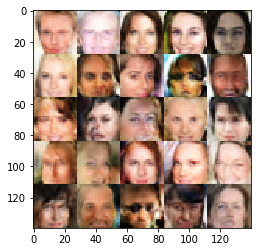

Epoch : 3/10 ... Step : 7100 ... d_loss : 1.343482494354248 ... g_loss : 1.5926940441131592
Epoch : 3/10 ... Step : 7200 ... d_loss : 0.8219732046127319 ... g_loss : 2.622340202331543
Epoch : 3/10 ... Step : 7300 ... d_loss : 1.0487332344055176 ... g_loss : 1.6222143173217773
Epoch : 3/10 ... Step : 7400 ... d_loss : 1.001349925994873 ... g_loss : 1.9789345264434814
Epoch : 3/10 ... Step : 7500 ... d_loss : 0.9625914096832275 ... g_loss : 3.802736759185791
Epoch : 3/10 ... Step : 7600 ... d_loss : 1.2320005893707275 ... g_loss : 4.247775077819824
Epoch : 3/10 ... Step : 7700 ... d_loss : 0.9103448390960693 ... g_loss : 2.448676586151123
Epoch : 3/10 ... Step : 7800 ... d_loss : 0.9577157497406006 ... g_loss : 3.8585729598999023
Epoch : 3/10 ... Step : 7900 ... d_loss : 0.8992130756378174 ... g_loss : 2.2432684898376465
Epoch : 3/10 ... Step : 8000 ... d_loss : 1.1481081247329712 ... g_loss : 1.2920409440994263


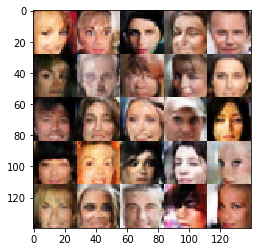

Epoch : 3/10 ... Step : 8100 ... d_loss : 0.7028653621673584 ... g_loss : 2.7249064445495605
Epoch : 3/10 ... Step : 8200 ... d_loss : 2.6256134510040283 ... g_loss : 0.5496190786361694
Epoch : 3/10 ... Step : 8300 ... d_loss : 1.245566964149475 ... g_loss : 0.821114182472229
Epoch : 3/10 ... Step : 8400 ... d_loss : 0.6713182926177979 ... g_loss : 2.3062779903411865
Epoch : 3/10 ... Step : 8500 ... d_loss : 0.6807258129119873 ... g_loss : 2.097799301147461
Epoch : 3/10 ... Step : 8600 ... d_loss : 0.7553219199180603 ... g_loss : 2.6116466522216797
Epoch : 3/10 ... Step : 8700 ... d_loss : 0.9430739879608154 ... g_loss : 1.9736133813858032
Epoch : 3/10 ... Step : 8800 ... d_loss : 0.803009033203125 ... g_loss : 3.370694160461426
Epoch : 3/10 ... Step : 8900 ... d_loss : 0.8601139187812805 ... g_loss : 2.536259412765503
Epoch : 3/10 ... Step : 9000 ... d_loss : 0.7496365308761597 ... g_loss : 2.26975679397583


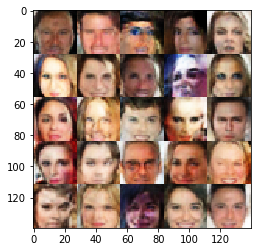

Epoch : 3/10 ... Step : 9100 ... d_loss : 0.5745474100112915 ... g_loss : 2.3936703205108643
Epoch : 3/10 ... Step : 9200 ... d_loss : 0.6010083556175232 ... g_loss : 2.9123780727386475
Epoch : 3/10 ... Step : 9300 ... d_loss : 0.5867687463760376 ... g_loss : 3.3987386226654053
Epoch : 3/10 ... Step : 9400 ... d_loss : 0.4880125820636749 ... g_loss : 2.654904842376709
Epoch : 4/10 ... Step : 9500 ... d_loss : 1.1490288972854614 ... g_loss : 1.3198280334472656
Epoch : 4/10 ... Step : 9600 ... d_loss : 0.9017680883407593 ... g_loss : 2.048611879348755
Epoch : 4/10 ... Step : 9700 ... d_loss : 0.9045364260673523 ... g_loss : 1.87785804271698
Epoch : 4/10 ... Step : 9800 ... d_loss : 0.7030047178268433 ... g_loss : 2.5484261512756348
Epoch : 4/10 ... Step : 9900 ... d_loss : 0.6606358289718628 ... g_loss : 2.341665744781494
Epoch : 4/10 ... Step : 10000 ... d_loss : 0.7823276519775391 ... g_loss : 3.823887586593628


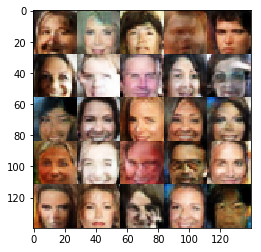

Epoch : 4/10 ... Step : 10100 ... d_loss : 1.6945858001708984 ... g_loss : 1.028611183166504
Epoch : 4/10 ... Step : 10200 ... d_loss : 0.7394459247589111 ... g_loss : 3.1026532649993896
Epoch : 4/10 ... Step : 10300 ... d_loss : 0.7658035159111023 ... g_loss : 2.3379876613616943
Epoch : 4/10 ... Step : 10400 ... d_loss : 0.508492112159729 ... g_loss : 2.9369165897369385
Epoch : 4/10 ... Step : 10500 ... d_loss : 0.922909677028656 ... g_loss : 2.0317649841308594
Epoch : 4/10 ... Step : 10600 ... d_loss : 0.7300931215286255 ... g_loss : 3.393954277038574
Epoch : 4/10 ... Step : 10700 ... d_loss : 0.5600781440734863 ... g_loss : 3.4122352600097656
Epoch : 4/10 ... Step : 10800 ... d_loss : 0.7772955894470215 ... g_loss : 2.9032037258148193
Epoch : 4/10 ... Step : 10900 ... d_loss : 1.1968241930007935 ... g_loss : 1.631685733795166
Epoch : 4/10 ... Step : 11000 ... d_loss : 1.2051210403442383 ... g_loss : 4.083104133605957


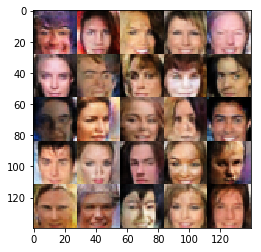

Epoch : 4/10 ... Step : 11100 ... d_loss : 0.71246337890625 ... g_loss : 2.375169515609741
Epoch : 4/10 ... Step : 11200 ... d_loss : 0.8374054431915283 ... g_loss : 3.3257837295532227
Epoch : 4/10 ... Step : 11300 ... d_loss : 0.5865560173988342 ... g_loss : 3.7219936847686768
Epoch : 4/10 ... Step : 11400 ... d_loss : 0.6202839612960815 ... g_loss : 2.706421375274658
Epoch : 4/10 ... Step : 11500 ... d_loss : 0.7854149341583252 ... g_loss : 1.3944685459136963
Epoch : 4/10 ... Step : 11600 ... d_loss : 0.29611140489578247 ... g_loss : 3.644597291946411
Epoch : 4/10 ... Step : 11700 ... d_loss : 1.8262118101119995 ... g_loss : 0.612784743309021
Epoch : 4/10 ... Step : 11800 ... d_loss : 1.7663906812667847 ... g_loss : 1.0549225807189941
Epoch : 4/10 ... Step : 11900 ... d_loss : 0.6712459921836853 ... g_loss : 2.7925586700439453
Epoch : 4/10 ... Step : 12000 ... d_loss : 0.789498507976532 ... g_loss : 1.7514467239379883


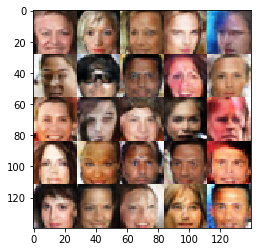

Epoch : 4/10 ... Step : 12100 ... d_loss : 0.6726211905479431 ... g_loss : 2.5773377418518066
Epoch : 4/10 ... Step : 12200 ... d_loss : 1.259340524673462 ... g_loss : 5.137176036834717
Epoch : 4/10 ... Step : 12300 ... d_loss : 0.5298715233802795 ... g_loss : 1.9807127714157104
Epoch : 4/10 ... Step : 12400 ... d_loss : 0.7703245878219604 ... g_loss : 3.4783098697662354
Epoch : 4/10 ... Step : 12500 ... d_loss : 0.8781579732894897 ... g_loss : 2.169605255126953
Epoch : 4/10 ... Step : 12600 ... d_loss : 0.6422690749168396 ... g_loss : 3.935750961303711
Epoch : 5/10 ... Step : 12700 ... d_loss : 0.7845191359519958 ... g_loss : 1.5572919845581055
Epoch : 5/10 ... Step : 12800 ... d_loss : 0.5242452025413513 ... g_loss : 3.0240607261657715
Epoch : 5/10 ... Step : 12900 ... d_loss : 0.45543918013572693 ... g_loss : 3.692035675048828
Epoch : 5/10 ... Step : 13000 ... d_loss : 0.68326735496521 ... g_loss : 1.9991034269332886


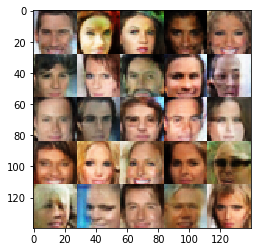

Epoch : 5/10 ... Step : 13100 ... d_loss : 0.8538817167282104 ... g_loss : 2.239060640335083
Epoch : 5/10 ... Step : 13200 ... d_loss : 0.7462594509124756 ... g_loss : 3.124514102935791
Epoch : 5/10 ... Step : 13300 ... d_loss : 1.1382801532745361 ... g_loss : 4.274450302124023
Epoch : 5/10 ... Step : 13400 ... d_loss : 0.5980654358863831 ... g_loss : 2.9747049808502197
Epoch : 5/10 ... Step : 13500 ... d_loss : 1.4470608234405518 ... g_loss : 0.5582433938980103
Epoch : 5/10 ... Step : 13600 ... d_loss : 0.5091935396194458 ... g_loss : 2.408543825149536
Epoch : 5/10 ... Step : 13700 ... d_loss : 0.9622642993927002 ... g_loss : 4.458247184753418
Epoch : 5/10 ... Step : 13800 ... d_loss : 0.9059696197509766 ... g_loss : 1.7288320064544678
Epoch : 5/10 ... Step : 13900 ... d_loss : 0.49663200974464417 ... g_loss : 2.8643152713775635
Epoch : 5/10 ... Step : 14000 ... d_loss : 0.5042358040809631 ... g_loss : 3.9907455444335938


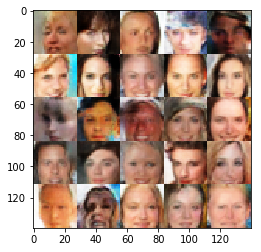

Epoch : 5/10 ... Step : 14100 ... d_loss : 0.6662298440933228 ... g_loss : 3.228095531463623
Epoch : 5/10 ... Step : 14200 ... d_loss : 0.46002233028411865 ... g_loss : 4.391447067260742
Epoch : 5/10 ... Step : 14300 ... d_loss : 1.1700336933135986 ... g_loss : 1.6732094287872314
Epoch : 5/10 ... Step : 14400 ... d_loss : 0.7857465744018555 ... g_loss : 3.548297643661499
Epoch : 5/10 ... Step : 14500 ... d_loss : 0.6128655076026917 ... g_loss : 2.2109146118164062
Epoch : 5/10 ... Step : 14600 ... d_loss : 0.7038672566413879 ... g_loss : 4.584820747375488
Epoch : 5/10 ... Step : 14700 ... d_loss : 0.49258366227149963 ... g_loss : 3.3716611862182617
Epoch : 5/10 ... Step : 14800 ... d_loss : 0.4984675943851471 ... g_loss : 2.9022645950317383
Epoch : 5/10 ... Step : 14900 ... d_loss : 0.4605007767677307 ... g_loss : 2.7170422077178955
Epoch : 5/10 ... Step : 15000 ... d_loss : 0.4048207402229309 ... g_loss : 2.237522602081299


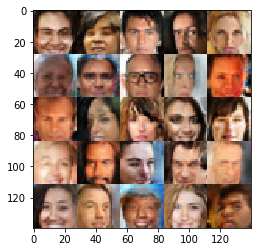

Epoch : 5/10 ... Step : 15100 ... d_loss : 0.5495904684066772 ... g_loss : 4.274508953094482
Epoch : 5/10 ... Step : 15200 ... d_loss : 1.1417763233184814 ... g_loss : 5.0984649658203125
Epoch : 5/10 ... Step : 15300 ... d_loss : 0.7007503509521484 ... g_loss : 3.202308416366577
Epoch : 5/10 ... Step : 15400 ... d_loss : 0.2835148274898529 ... g_loss : 3.6047892570495605
Epoch : 5/10 ... Step : 15500 ... d_loss : 0.48963406682014465 ... g_loss : 3.015425443649292
Epoch : 5/10 ... Step : 15600 ... d_loss : 0.5940386056900024 ... g_loss : 1.8531861305236816
Epoch : 5/10 ... Step : 15700 ... d_loss : 0.45043426752090454 ... g_loss : 3.1974971294403076
Epoch : 5/10 ... Step : 15800 ... d_loss : 2.295281171798706 ... g_loss : 7.282395362854004
Epoch : 6/10 ... Step : 15900 ... d_loss : 0.9521232843399048 ... g_loss : 1.7531449794769287
Epoch : 6/10 ... Step : 16000 ... d_loss : 1.4277324676513672 ... g_loss : 1.2389965057373047


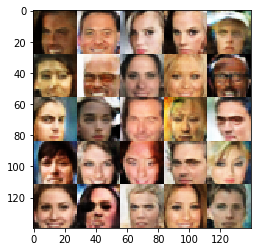

Epoch : 6/10 ... Step : 16100 ... d_loss : 0.8824093341827393 ... g_loss : 2.5958380699157715
Epoch : 6/10 ... Step : 16200 ... d_loss : 0.9998841285705566 ... g_loss : 3.8588995933532715
Epoch : 6/10 ... Step : 16300 ... d_loss : 0.4034867584705353 ... g_loss : 2.896895408630371
Epoch : 6/10 ... Step : 16400 ... d_loss : 1.2628998756408691 ... g_loss : 1.4639250040054321
Epoch : 6/10 ... Step : 16500 ... d_loss : 0.9518799781799316 ... g_loss : 4.724231719970703
Epoch : 6/10 ... Step : 16600 ... d_loss : 0.5744186639785767 ... g_loss : 4.426523208618164
Epoch : 6/10 ... Step : 16700 ... d_loss : 0.4630897641181946 ... g_loss : 2.913968563079834
Epoch : 6/10 ... Step : 16800 ... d_loss : 0.9681833982467651 ... g_loss : 2.0121536254882812
Epoch : 6/10 ... Step : 16900 ... d_loss : 0.4148027002811432 ... g_loss : 3.496781826019287
Epoch : 6/10 ... Step : 17000 ... d_loss : 0.5631539225578308 ... g_loss : 3.242596387863159


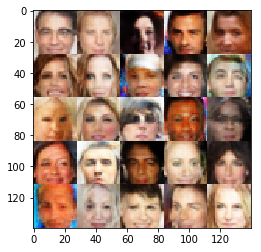

Epoch : 6/10 ... Step : 17100 ... d_loss : 0.45291274785995483 ... g_loss : 4.078069686889648
Epoch : 6/10 ... Step : 17200 ... d_loss : 0.6909208297729492 ... g_loss : 3.089144468307495
Epoch : 6/10 ... Step : 17300 ... d_loss : 0.4461338520050049 ... g_loss : 3.192996025085449
Epoch : 6/10 ... Step : 17400 ... d_loss : 0.3236614465713501 ... g_loss : 3.702101469039917
Epoch : 6/10 ... Step : 17500 ... d_loss : 0.4362013638019562 ... g_loss : 1.9984833002090454
Epoch : 6/10 ... Step : 17600 ... d_loss : 0.7743598818778992 ... g_loss : 3.623182773590088
Epoch : 6/10 ... Step : 17700 ... d_loss : 0.3780466914176941 ... g_loss : 3.2729809284210205
Epoch : 6/10 ... Step : 17800 ... d_loss : 0.37984567880630493 ... g_loss : 2.1182308197021484
Epoch : 6/10 ... Step : 17900 ... d_loss : 0.815837025642395 ... g_loss : 4.527919769287109
Epoch : 6/10 ... Step : 18000 ... d_loss : 0.25404128432273865 ... g_loss : 3.0086679458618164


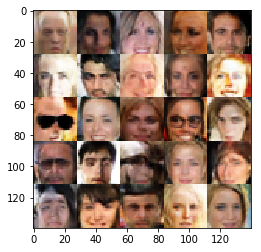

Epoch : 6/10 ... Step : 18100 ... d_loss : 0.2595529854297638 ... g_loss : 3.7083120346069336
Epoch : 6/10 ... Step : 18200 ... d_loss : 0.7828348875045776 ... g_loss : 2.866349458694458
Epoch : 6/10 ... Step : 18300 ... d_loss : 1.9444128274917603 ... g_loss : 2.153394937515259
Epoch : 6/10 ... Step : 18400 ... d_loss : 0.6967604756355286 ... g_loss : 3.529205083847046
Epoch : 6/10 ... Step : 18500 ... d_loss : 0.5677890777587891 ... g_loss : 3.174543857574463
Epoch : 6/10 ... Step : 18600 ... d_loss : 0.33750051259994507 ... g_loss : 2.7874555587768555
Epoch : 6/10 ... Step : 18700 ... d_loss : 0.5003470182418823 ... g_loss : 3.0213699340820312
Epoch : 6/10 ... Step : 18800 ... d_loss : 0.9194724559783936 ... g_loss : 4.649141311645508
Epoch : 6/10 ... Step : 18900 ... d_loss : 0.3088234066963196 ... g_loss : 4.01493501663208
Epoch : 7/10 ... Step : 19000 ... d_loss : 0.4995928406715393 ... g_loss : 3.4326868057250977


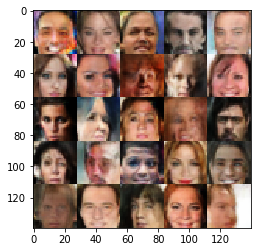

Epoch : 7/10 ... Step : 19100 ... d_loss : 0.33870598673820496 ... g_loss : 3.4972002506256104
Epoch : 7/10 ... Step : 19200 ... d_loss : 1.1111290454864502 ... g_loss : 5.109225273132324
Epoch : 7/10 ... Step : 19300 ... d_loss : 0.6588874459266663 ... g_loss : 4.760197639465332
Epoch : 7/10 ... Step : 19400 ... d_loss : 0.6062784790992737 ... g_loss : 2.405925750732422
Epoch : 7/10 ... Step : 19500 ... d_loss : 0.6685357689857483 ... g_loss : 3.095276355743408
Epoch : 7/10 ... Step : 19600 ... d_loss : 0.683118999004364 ... g_loss : 2.7883472442626953
Epoch : 7/10 ... Step : 19700 ... d_loss : 0.27118244767189026 ... g_loss : 4.3980393409729
Epoch : 7/10 ... Step : 19800 ... d_loss : 0.6288278698921204 ... g_loss : 4.591108798980713
Epoch : 7/10 ... Step : 19900 ... d_loss : 0.5391373038291931 ... g_loss : 2.853424072265625
Epoch : 7/10 ... Step : 20000 ... d_loss : 0.4128160774707794 ... g_loss : 5.334186553955078


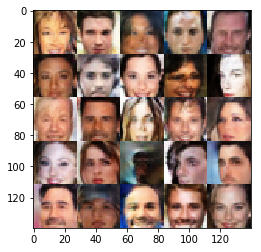

Epoch : 7/10 ... Step : 20100 ... d_loss : 0.7517808079719543 ... g_loss : 2.3440983295440674
Epoch : 7/10 ... Step : 20200 ... d_loss : 0.5547265410423279 ... g_loss : 4.458899974822998
Epoch : 7/10 ... Step : 20300 ... d_loss : 0.38815000653266907 ... g_loss : 2.6277432441711426
Epoch : 7/10 ... Step : 20400 ... d_loss : 0.5144615769386292 ... g_loss : 3.098829507827759
Epoch : 7/10 ... Step : 20500 ... d_loss : 0.7546589970588684 ... g_loss : 2.2400999069213867
Epoch : 7/10 ... Step : 20600 ... d_loss : 0.5093569755554199 ... g_loss : 3.4574711322784424
Epoch : 7/10 ... Step : 20700 ... d_loss : 0.6395527124404907 ... g_loss : 4.219939231872559
Epoch : 7/10 ... Step : 20800 ... d_loss : 0.8537288904190063 ... g_loss : 5.322189807891846
Epoch : 7/10 ... Step : 20900 ... d_loss : 0.629326581954956 ... g_loss : 2.4871304035186768
Epoch : 7/10 ... Step : 21000 ... d_loss : 0.5708512663841248 ... g_loss : 3.943169355392456


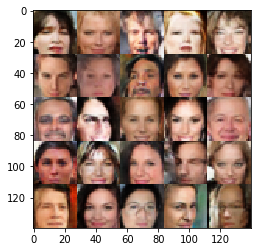

Epoch : 7/10 ... Step : 21100 ... d_loss : 0.36391422152519226 ... g_loss : 3.9927830696105957
Epoch : 7/10 ... Step : 21200 ... d_loss : 0.9148227572441101 ... g_loss : 4.7362165451049805
Epoch : 7/10 ... Step : 21300 ... d_loss : 0.642356812953949 ... g_loss : 2.255410671234131
Epoch : 7/10 ... Step : 21400 ... d_loss : 0.3173617720603943 ... g_loss : 3.400578260421753
Epoch : 7/10 ... Step : 21500 ... d_loss : 0.5292859077453613 ... g_loss : 3.0635643005371094
Epoch : 7/10 ... Step : 21600 ... d_loss : 0.6463867425918579 ... g_loss : 2.963416814804077
Epoch : 7/10 ... Step : 21700 ... d_loss : 0.32654380798339844 ... g_loss : 2.9017269611358643
Epoch : 7/10 ... Step : 21800 ... d_loss : 1.6473469734191895 ... g_loss : 4.692490100860596
Epoch : 7/10 ... Step : 21900 ... d_loss : 0.8970410823822021 ... g_loss : 0.8817598819732666
Epoch : 7/10 ... Step : 22000 ... d_loss : 0.4314296245574951 ... g_loss : 3.140662670135498


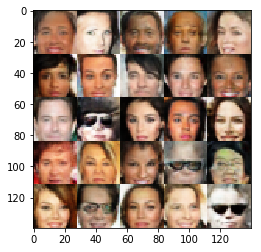

Epoch : 7/10 ... Step : 22100 ... d_loss : 1.0165889263153076 ... g_loss : 2.1017136573791504
Epoch : 8/10 ... Step : 22200 ... d_loss : 0.9062074422836304 ... g_loss : 5.512767314910889
Epoch : 8/10 ... Step : 22300 ... d_loss : 0.4493943452835083 ... g_loss : 3.249006509780884
Epoch : 8/10 ... Step : 22400 ... d_loss : 0.45650938153266907 ... g_loss : 4.288972854614258
Epoch : 8/10 ... Step : 22500 ... d_loss : 0.41852399706840515 ... g_loss : 3.594541072845459
Epoch : 8/10 ... Step : 22600 ... d_loss : 0.21009542047977448 ... g_loss : 4.340964317321777
Epoch : 8/10 ... Step : 22700 ... d_loss : 0.8419570922851562 ... g_loss : 1.9974706172943115
Epoch : 8/10 ... Step : 22800 ... d_loss : 1.9347351789474487 ... g_loss : 7.573745250701904
Epoch : 8/10 ... Step : 22900 ... d_loss : 0.601509153842926 ... g_loss : 2.7182986736297607
Epoch : 8/10 ... Step : 23000 ... d_loss : 0.7428664565086365 ... g_loss : 5.11909294128418


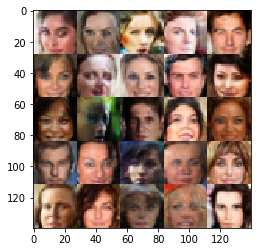

Epoch : 8/10 ... Step : 23100 ... d_loss : 0.2903788387775421 ... g_loss : 3.161898612976074
Epoch : 8/10 ... Step : 23200 ... d_loss : 0.7579244375228882 ... g_loss : 3.954948902130127
Epoch : 8/10 ... Step : 23300 ... d_loss : 0.39594796299934387 ... g_loss : 2.5396549701690674
Epoch : 8/10 ... Step : 23400 ... d_loss : 0.4070526957511902 ... g_loss : 4.291070938110352
Epoch : 8/10 ... Step : 23500 ... d_loss : 0.49327829480171204 ... g_loss : 2.6119842529296875
Epoch : 8/10 ... Step : 23600 ... d_loss : 2.494163990020752 ... g_loss : 0.7700488567352295
Epoch : 8/10 ... Step : 23700 ... d_loss : 0.5247263312339783 ... g_loss : 2.4823012351989746
Epoch : 8/10 ... Step : 23800 ... d_loss : 0.7760464549064636 ... g_loss : 4.1788530349731445
Epoch : 8/10 ... Step : 23900 ... d_loss : 0.5958788990974426 ... g_loss : 3.686458110809326
Epoch : 8/10 ... Step : 24000 ... d_loss : 0.9821928143501282 ... g_loss : 2.3042964935302734


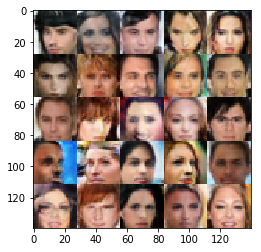

Epoch : 8/10 ... Step : 24100 ... d_loss : 0.562045156955719 ... g_loss : 3.774444103240967
Epoch : 8/10 ... Step : 24200 ... d_loss : 0.49985647201538086 ... g_loss : 2.850285768508911
Epoch : 8/10 ... Step : 24300 ... d_loss : 0.83821040391922 ... g_loss : 5.4812188148498535
Epoch : 8/10 ... Step : 24400 ... d_loss : 0.565496563911438 ... g_loss : 2.4410972595214844
Epoch : 8/10 ... Step : 24500 ... d_loss : 0.38257500529289246 ... g_loss : 3.5053799152374268
Epoch : 8/10 ... Step : 24600 ... d_loss : 0.4922606647014618 ... g_loss : 3.6355161666870117
Epoch : 8/10 ... Step : 24700 ... d_loss : 0.2825647294521332 ... g_loss : 4.237913608551025
Epoch : 8/10 ... Step : 24800 ... d_loss : 0.5125091075897217 ... g_loss : 3.534555196762085
Epoch : 8/10 ... Step : 24900 ... d_loss : 0.4888342618942261 ... g_loss : 4.650262832641602
Epoch : 8/10 ... Step : 25000 ... d_loss : 0.5450526475906372 ... g_loss : 3.4464707374572754


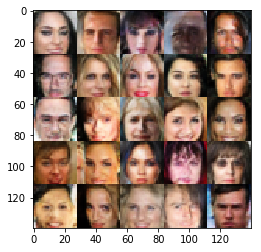

Epoch : 8/10 ... Step : 25100 ... d_loss : 0.70851731300354 ... g_loss : 2.168682336807251
Epoch : 8/10 ... Step : 25200 ... d_loss : 0.6343314051628113 ... g_loss : 3.8660333156585693
Epoch : 8/10 ... Step : 25300 ... d_loss : 0.6802344918251038 ... g_loss : 2.352745532989502
Epoch : 9/10 ... Step : 25400 ... d_loss : 0.4724244177341461 ... g_loss : 3.1325526237487793
Epoch : 9/10 ... Step : 25500 ... d_loss : 0.8329265713691711 ... g_loss : 5.115625381469727
Epoch : 9/10 ... Step : 25600 ... d_loss : 0.4591377377510071 ... g_loss : 4.443924903869629
Epoch : 9/10 ... Step : 25700 ... d_loss : 0.574781596660614 ... g_loss : 2.47969126701355
Epoch : 9/10 ... Step : 25800 ... d_loss : 0.560326337814331 ... g_loss : 4.967278003692627
Epoch : 9/10 ... Step : 25900 ... d_loss : 1.2577061653137207 ... g_loss : 1.461259365081787
Epoch : 9/10 ... Step : 26000 ... d_loss : 0.8146440982818604 ... g_loss : 6.084399223327637


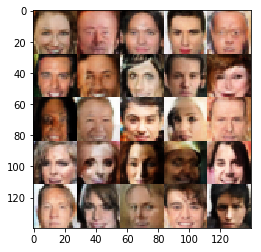

Epoch : 9/10 ... Step : 26100 ... d_loss : 1.2179343700408936 ... g_loss : 6.256317138671875
Epoch : 9/10 ... Step : 26200 ... d_loss : 0.34784674644470215 ... g_loss : 4.834577560424805
Epoch : 9/10 ... Step : 26300 ... d_loss : 0.728064239025116 ... g_loss : 4.95322322845459
Epoch : 9/10 ... Step : 26400 ... d_loss : 0.520451545715332 ... g_loss : 4.253430366516113
Epoch : 9/10 ... Step : 26500 ... d_loss : 0.5203449130058289 ... g_loss : 2.5906455516815186
Epoch : 9/10 ... Step : 26600 ... d_loss : 0.8281010389328003 ... g_loss : 2.7502641677856445
Epoch : 9/10 ... Step : 26700 ... d_loss : 0.7738498449325562 ... g_loss : 4.369157791137695
Epoch : 9/10 ... Step : 26800 ... d_loss : 0.8591610789299011 ... g_loss : 0.890223503112793
Epoch : 9/10 ... Step : 26900 ... d_loss : 0.5576380491256714 ... g_loss : 4.762009620666504
Epoch : 9/10 ... Step : 27000 ... d_loss : 0.8172222375869751 ... g_loss : 5.0529937744140625


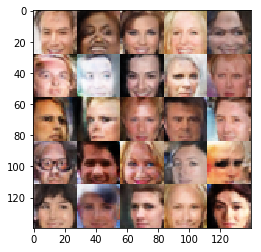

Epoch : 9/10 ... Step : 27100 ... d_loss : 0.4947045147418976 ... g_loss : 2.7409324645996094
Epoch : 9/10 ... Step : 27200 ... d_loss : 1.1480430364608765 ... g_loss : 1.9024107456207275
Epoch : 9/10 ... Step : 27300 ... d_loss : 0.17134837806224823 ... g_loss : 4.815121650695801
Epoch : 9/10 ... Step : 27400 ... d_loss : 0.5296051502227783 ... g_loss : 4.223160743713379
Epoch : 9/10 ... Step : 27500 ... d_loss : 0.23192356526851654 ... g_loss : 2.992959976196289
Epoch : 9/10 ... Step : 27600 ... d_loss : 0.33151912689208984 ... g_loss : 4.480126857757568
Epoch : 9/10 ... Step : 27700 ... d_loss : 0.5309429168701172 ... g_loss : 2.898496150970459
Epoch : 9/10 ... Step : 27800 ... d_loss : 1.048905611038208 ... g_loss : 6.420976638793945
Epoch : 9/10 ... Step : 27900 ... d_loss : 0.445104718208313 ... g_loss : 4.207610130310059
Epoch : 9/10 ... Step : 28000 ... d_loss : 0.7958118319511414 ... g_loss : 1.9112604856491089


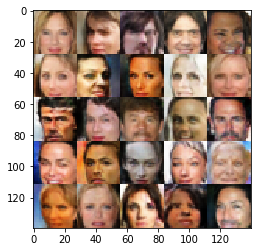

Epoch : 9/10 ... Step : 28100 ... d_loss : 0.20199905335903168 ... g_loss : 4.109408378601074
Epoch : 9/10 ... Step : 28200 ... d_loss : 0.4520699381828308 ... g_loss : 4.364815711975098
Epoch : 9/10 ... Step : 28300 ... d_loss : 0.6526198983192444 ... g_loss : 4.825530529022217
Epoch : 9/10 ... Step : 28400 ... d_loss : 0.31931233406066895 ... g_loss : 3.774890422821045
Epoch : 10/10 ... Step : 28500 ... d_loss : 0.43225109577178955 ... g_loss : 3.9336647987365723
Epoch : 10/10 ... Step : 28600 ... d_loss : 1.4021209478378296 ... g_loss : 6.335894584655762
Epoch : 10/10 ... Step : 28700 ... d_loss : 0.3520445227622986 ... g_loss : 4.227517604827881
Epoch : 10/10 ... Step : 28800 ... d_loss : 0.4628414213657379 ... g_loss : 3.87984561920166
Epoch : 10/10 ... Step : 28900 ... d_loss : 0.5431374311447144 ... g_loss : 2.9818170070648193
Epoch : 10/10 ... Step : 29000 ... d_loss : 0.5955066680908203 ... g_loss : 3.5720081329345703


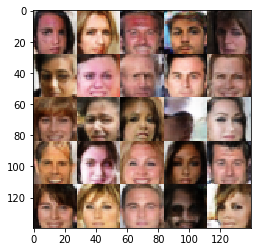

Epoch : 10/10 ... Step : 29100 ... d_loss : 0.6319464445114136 ... g_loss : 5.0782246589660645
Epoch : 10/10 ... Step : 29200 ... d_loss : 0.6223757266998291 ... g_loss : 4.5989837646484375
Epoch : 10/10 ... Step : 29300 ... d_loss : 0.5338413119316101 ... g_loss : 3.715867519378662
Epoch : 10/10 ... Step : 29400 ... d_loss : 0.46368783712387085 ... g_loss : 3.0880022048950195
Epoch : 10/10 ... Step : 29500 ... d_loss : 0.31314587593078613 ... g_loss : 3.5558037757873535
Epoch : 10/10 ... Step : 29600 ... d_loss : 0.4675695300102234 ... g_loss : 4.577304840087891
Epoch : 10/10 ... Step : 29700 ... d_loss : 0.28852054476737976 ... g_loss : 3.400904893875122
Epoch : 10/10 ... Step : 29800 ... d_loss : 0.42487820982933044 ... g_loss : 5.156136512756348
Epoch : 10/10 ... Step : 29900 ... d_loss : 0.43243855237960815 ... g_loss : 4.130727767944336
Epoch : 10/10 ... Step : 30000 ... d_loss : 0.865479588508606 ... g_loss : 5.522984027862549


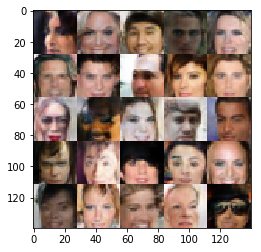

Epoch : 10/10 ... Step : 30100 ... d_loss : 0.8868106603622437 ... g_loss : 4.330780982971191
Epoch : 10/10 ... Step : 30200 ... d_loss : 0.5293971300125122 ... g_loss : 3.0286741256713867
Epoch : 10/10 ... Step : 30300 ... d_loss : 0.37130117416381836 ... g_loss : 4.094688892364502
Epoch : 10/10 ... Step : 30400 ... d_loss : 0.29250621795654297 ... g_loss : 3.4944167137145996
Epoch : 10/10 ... Step : 30500 ... d_loss : 0.34419310092926025 ... g_loss : 3.4302597045898438
Epoch : 10/10 ... Step : 30600 ... d_loss : 0.24945887923240662 ... g_loss : 3.6303677558898926
Epoch : 10/10 ... Step : 30700 ... d_loss : 0.3827514350414276 ... g_loss : 4.596528053283691
Epoch : 10/10 ... Step : 30800 ... d_loss : 0.4845985472202301 ... g_loss : 3.4902286529541016
Epoch : 10/10 ... Step : 30900 ... d_loss : 0.2522640824317932 ... g_loss : 4.130110740661621
Epoch : 10/10 ... Step : 31000 ... d_loss : 0.5127048492431641 ... g_loss : 4.152775287628174


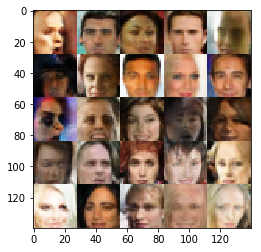

Epoch : 10/10 ... Step : 31100 ... d_loss : 0.8902514576911926 ... g_loss : 5.407114505767822
Epoch : 10/10 ... Step : 31200 ... d_loss : 0.537254810333252 ... g_loss : 4.573232173919678
Epoch : 10/10 ... Step : 31300 ... d_loss : 0.8989970684051514 ... g_loss : 4.948537826538086
Epoch : 10/10 ... Step : 31400 ... d_loss : 0.7159176468849182 ... g_loss : 6.900469779968262
Epoch : 10/10 ... Step : 31500 ... d_loss : 0.7058014273643494 ... g_loss : 3.815333127975464
Epoch : 10/10 ... Step : 31600 ... d_loss : 0.5630948543548584 ... g_loss : 3.7608654499053955


In [30]:
batch_size = 64
z_dim = 200
learning_rate = 1e-3
beta1 = .5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 10

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.